In [66]:
suppressPackageStartupMessages({
    library(HGNChelper)
    library(stringr)
    library(tidyverse)
    library(limma)
    library(GSVA)
    library(edgeR)
    library(ggsignif)
    library(survival)
    library(patchwork)
    library(ROCR)
})

In [71]:
dt.tmp <- get(load("BRCA.RData"))
gene_len <- dt.tmp@rowRanges %>% data.frame %>% dplyr::select(bp_length, gene_name) %>% group_by(gene_name) %>% summarise(bp_length = sum(bp_length))

In [82]:
gene_bp_len <- gene_len$bp_length
names(gene_bp_len) <- gene_len$gene_name

In [36]:
normals <- c(
    "BRCA" = "BREAST",
    "COAD" = "COLON",
    "READ" = "COLON",
    "ESCA" = "ESOPHAGUS",
    "LIHC" = "LIVER",
    "LUAD" = "LUNG",
    "PAAD" = "PANCREAS",
    "PRAD" = "PROSTATE",
    "STAD" = "STOMACH"
)
tokens <- c(
    'STAD' = 'M5',
    'BRCA' = 'M4',
    'CRC' = 'M9',
    'EAC' = 'M1',
    'LIHC' = 'M2',
    'LUAD' = 'M1',
    'PDAC' = 'M4',
    'PRAD' = 'M6'
)
cancer_types <- names(normals)

In [38]:
presigs <- lapply(names(tokens), function(cancer.alias) {
    sigs <- read.table(paste0("/data/egc21/data_db/6.signature.v1.6.median/", cancer.alias, ".txt"), header = T)[[tokens[[cancer.alias]]]]})
names(presigs) <- names(tokens)

In [4]:
load("/data3/zzy20/PA_221107.RData")

In [16]:
gene_numer_program <- 50
mp <- read.table("/data3/zzy20/HMD_HumanPhenotype.rpt", sep = "\t")
gsea.plot <- list()
median.plot <- list()

In [111]:
for(i in 1:8){
    cancer <- names(presigs)[i]
    program <- presigs[[cancer]]
    program <- program[1:gene_numer_program]
    program_m <- mp %>% filter(V1 %in% program) %>% pull(V3)
    idx <- grep(cancer, names(bulk_datasets))
    gsea.plot[[str_c(cancer, "_", tokens[[cancer]])]] <- list()
    median.plot[[str_c(cancer, "_", tokens[[cancer]])]] <- list()
    for (each_bulk in names(bulk_datasets)[idx]){
        if (ts2 %>% filter(`Project ID` == each_bulk) %>%
                pull(Organism) != "Homo sapiens") {
            program_valid <- intersect(rownames(bulk_datasets[[
                each_bulk]]$expr),
                program_m)
        } else{
            program_valid <- intersect(rownames(bulk_datasets[[
                each_bulk]]$expr),
                program)}
        print(each_bulk)
        print(ts2 %>% filter(`Project ID` == each_bulk) %>%
                pull(Organism))
        print(length(program_valid))
        tpm_sc <- t(scale(t(bulk_datasets[[each_bulk]]$expr)))
        ssgsea.res <- gsva(
            as.matrix(tpm_sc),
            data.frame(program_valid),
            method = "ssgsea", ssgsea.norm = T)
            
        dt <- bulk_datasets[[each_bulk]]$samples
        dt$gsea <- ssgsea.res[, rownames(dt)]
        dt$expr_median <- unlist(map(rownames(dt),
            ~ median(tpm_sc[program_valid, .])))
        norm_stage <- str_c(cancer, "_normal")
        pml <- unique(dt$premalignant_stage)
        pml <- str_sort(pml[!pml %in% c(norm_stage, cancer)])
        pml <- c(norm_stage, pml, cancer)
        dt$premalignant_stage <- factor(dt$premalignant_stage, levels = pml)
        gsea.plot[[str_c(cancer, "_",
            tokens[[cancer]])]][[each_bulk]] <- ggplot(dt,
                aes(x = premalignant_stage, y = gsea, fill = premalignant_stage)) +
                geom_boxplot() +
                xlab("") +
                ggtitle(each_bulk) +
                theme(axis.text.x = element_text(angle = 45,
                vjust = 1, hjust=1))+

                scale_fill_manual(values = colorRampPalette(c("#228B22", "#FA8072"))(length(unique(dt$premalignant_stage)))) +
                theme(
                panel.background = element_blank(),
                axis.line = element_line()) +
                NULL
        median.plot[[str_c(cancer, "_",
            tokens[[cancer]])]][[each_bulk]] <- ggplot(dt,
                aes(x = premalignant_stage, y = expr_median, fill = premalignant_stage)) +
                geom_boxplot() +
                xlab("") +
                ggtitle(each_bulk) +
                theme(axis.text.x = element_text(angle = 45,
                vjust = 1, hjust=1))+

                scale_fill_manual(values = colorRampPalette(c("#228B22", "#FA8072"))(length(unique(dt$premalignant_stage)))) +
                theme(
                panel.background = element_blank(),
                axis.line = element_line()) +
                NULL
    }
}


[1] "STAD_bulk_1"
[1] "Homo sapiens"
[1] 45
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_2"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_3"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_4"
[1] "Homo sapiens"
[1] 3
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_5"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_6"
[1] "Homo sapiens"
[1] 1


Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
“Some gene sets have size one. Consider setting 'min.sz > 1'.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_7"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_8"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_9"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_10"
[1] "Mus musculus"
[1] 56
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_11"
[1] "Homo sapiens"
[1] 46
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "STAD_bulk_12"
[1] "Homo sapiens"
[1

Warning message in .filterFeatures(expr, method):
“4327 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "BRCA_bulk_4"
[1] "Homo sapiens"
[1] 48
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "BRCA_bulk_5"
[1] "Homo sapiens"
[1] 48
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "BRCA_bulk_6"
[1] "Homo sapiens"
[1] 48
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "BRCA_bulk_7"
[1] "Homo sapiens"
[1] 47
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "BRCA_bulk_8"
[1] "Homo sapiens"
[1] 48
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "BRCA_bulk_9"
[1] "Homo sapiens"
[1] 4

Warning message in .filterFeatures(expr, method):
“10203 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "EAC_bulk_4"
[1] "Homo sapiens"
[1] 46
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "EAC_bulk_5"
[1] "Homo sapiens"
[1] 42
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "EAC_bulk_6"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "EAC_bulk_7"
[1] "Homo sapiens"
[1] 39
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "EAC_bulk_8"
[1] "Homo sapiens"
[1] 46
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "EAC_bulk_9"
[1] "Homo sapiens"
[1] 40
Esti

Warning message in .filterFeatures(expr, method):
“5461 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "LIHC_bulk_2"
[1] "Homo sapiens"
[1] 48
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "LIHC_bulk_3"
[1] "Homo sapiens"
[1] 49


Warning message in .filterFeatures(expr, method):
“2194 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "LIHC_bulk_4"
[1] "Homo sapiens"
[1] 42
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "LIHC_bulk_5"
[1] "Homo sapiens"
[1] 40
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "LIHC_bulk_6"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "LIHC_bulk_7"
[1] "Homo sapiens"
[1] 48
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "LUAD_bulk_1"
[1] "Mus musculus"
[1] 38
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_1"
[1] "Homo sapiens"
[1] 4

Warning message in .filterFeatures(expr, method):
“1 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_2"
[1] "Homo sapiens"
[1] 48
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_3"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_4"
[1] "Mus musculus"
[1] 57
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_5"
[1] "Homo sapiens"
[1] 36
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_6"
[1] "Mus musculus"
[1] 55


Warning message in .filterFeatures(expr, method):
“925 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_7"
[1] "Homo sapiens"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_8"
[1] "Homo sapiens"
[1] 45
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PDAC_bulk_9"
[1] "Homo sapiens"
[1] 47
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PRAD_bulk_1"
[1] "Mus musculus"
[1] 49
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PRAD_bulk_2"
[1] "Mus musculus"
[1] 44
Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PRAD_bulk_3"
[1] "Mus musculus"
[1] 4

Warning message in .filterFeatures(expr, method):
“13 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PRAD_bulk_6"
[1] "Homo sapiens"
[1] 28


Warning message in .filterFeatures(expr, method):
“11 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%

[1] "PRAD_bulk_7"
[1] "Homo sapiens"
[1] 50


Warning message in .filterFeatures(expr, method):
“8311 genes with constant expression values throuhgout the samples.”


Estimating ssGSEA scores for 1 gene sets.
  |======================================================================| 100%



In [40]:
# tpm_sc
cancer
presigs[[cancer]]
program
program_valid
# ts2
ts2 %>% filter(`Project ID` == each_bulk) %>%
                pull(Organism) != "Homo sapiens"

[1] "STAD"

[1] "CDA"      "CLDN7"    "KRT7"     "LGALS1"   "LAMC2"    "S100A2"  
  [7] "CLDN4"    "IGFBP6"   "DHRS9"    "SLC16A3"  "TYMP"     "AHNAK2"  
 [13] "KLK10"    "SLC2A1"   "KRT16"    "TFF3"     "PDLIM7"   "SULT2B1" 
 [19] "PLOD2"    "SEMA7A"   "F3"       "IL32"     "CEACAM6"  "CEACAM5" 
 [25] "ECM1"     "ANGPTL4"  "MSN"      "REG4"     "ANXA1"    "FLNA"    
 [31] "MMP7"     "SERPINA1" "KLK7"     "KLK11"    "S100A10"  "CAMK2N1" 
 [37] "ETS2"     "TM4SF1"   "LAMA3"    "KRT17"    "HES4"     "PMEPA1"  
 [43] "ITGA2"    "MFI2"     "NDUFA4L2" "CDHR2"    "SERPINB2" "TUBA4A"  
 [49] "TNS4"     "PRSS1"    "HLA-G"    "ISG15"    "KIAA1462" "TIMP1"   
 [55] "SCNN1D"   "TRIM29"   "CAV2"     "EFNA1"    "CAV1"     "MUC17"   
 [61] "PRSS3"    "PDLIM4"   "DDIT4"    "KLK6"     "DUOX2"    "CD55"    
 [67] "LY6D"     "LDHA"     "PMP22"    "EGLN3"    "SEPW1"    "COL17A1" 
 [73] "MALL"     "GPRC5A"   "MDK"      "SLC6A14"  "SPINK4"   "C19orf33"
 [79] "HKDC1"    "CDK6"     "RND3"     "EMP1"     "HSPB8"    "RNF213"  
 [85] "IGFBP3"   "BST2"     "PRSS23"   "CA12"     "TSHZ2"    "RRAS"    
 [91] "HAS3"     "NRP2"     "ISG20"    "IFI6"     "HMOX1"    "IFITM3"  
 [97] "HK2"      "HSPG2"    "PRAC1"    "TGM2"

[1] "CDA"      "CLDN7"    "KRT7"     "LGALS1"   "LAMC2"    "S100A2"  
 [7] "CLDN4"    "IGFBP6"   "DHRS9"    "SLC16A3"  "TYMP"     "AHNAK2"  
[13] "KLK10"    "SLC2A1"   "KRT16"    "TFF3"     "PDLIM7"   "SULT2B1" 
[19] "PLOD2"    "SEMA7A"   "F3"       "IL32"     "CEACAM6"  "CEACAM5" 
[25] "ECM1"     "ANGPTL4"  "MSN"      "REG4"     "ANXA1"    "FLNA"    
[31] "MMP7"     "SERPINA1" "KLK7"     "KLK11"    "S100A10"  "CAMK2N1" 
[37] "ETS2"     "TM4SF1"   "LAMA3"    "KRT17"    "HES4"     "PMEPA1"  
[43] "ITGA2"    "MFI2"     "NDUFA4L2" "CDHR2"    "SERPINB2" "TUBA4A"  
[49] "TNS4"     "PRSS1"

character(0)

[1] FALSE

In [112]:
for(nn in names(median.plot)) {
    p <- wrap_plots(median.plot[[nn]]) +
        plot_annotation(title = nn)
    ggsave(str_c("/data3/zzy20/PreSig_bulk/", nn, "_median.jpg"), width = 15, height = 10)
    p <- wrap_plots(gsea.plot[[nn]]) +
        plot_annotation(title = nn)
    ggsave(str_c("/data3/zzy20/PreSig_bulk/", nn, "_ssgsea.jpg"), width = 15, height = 10)
}


Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”


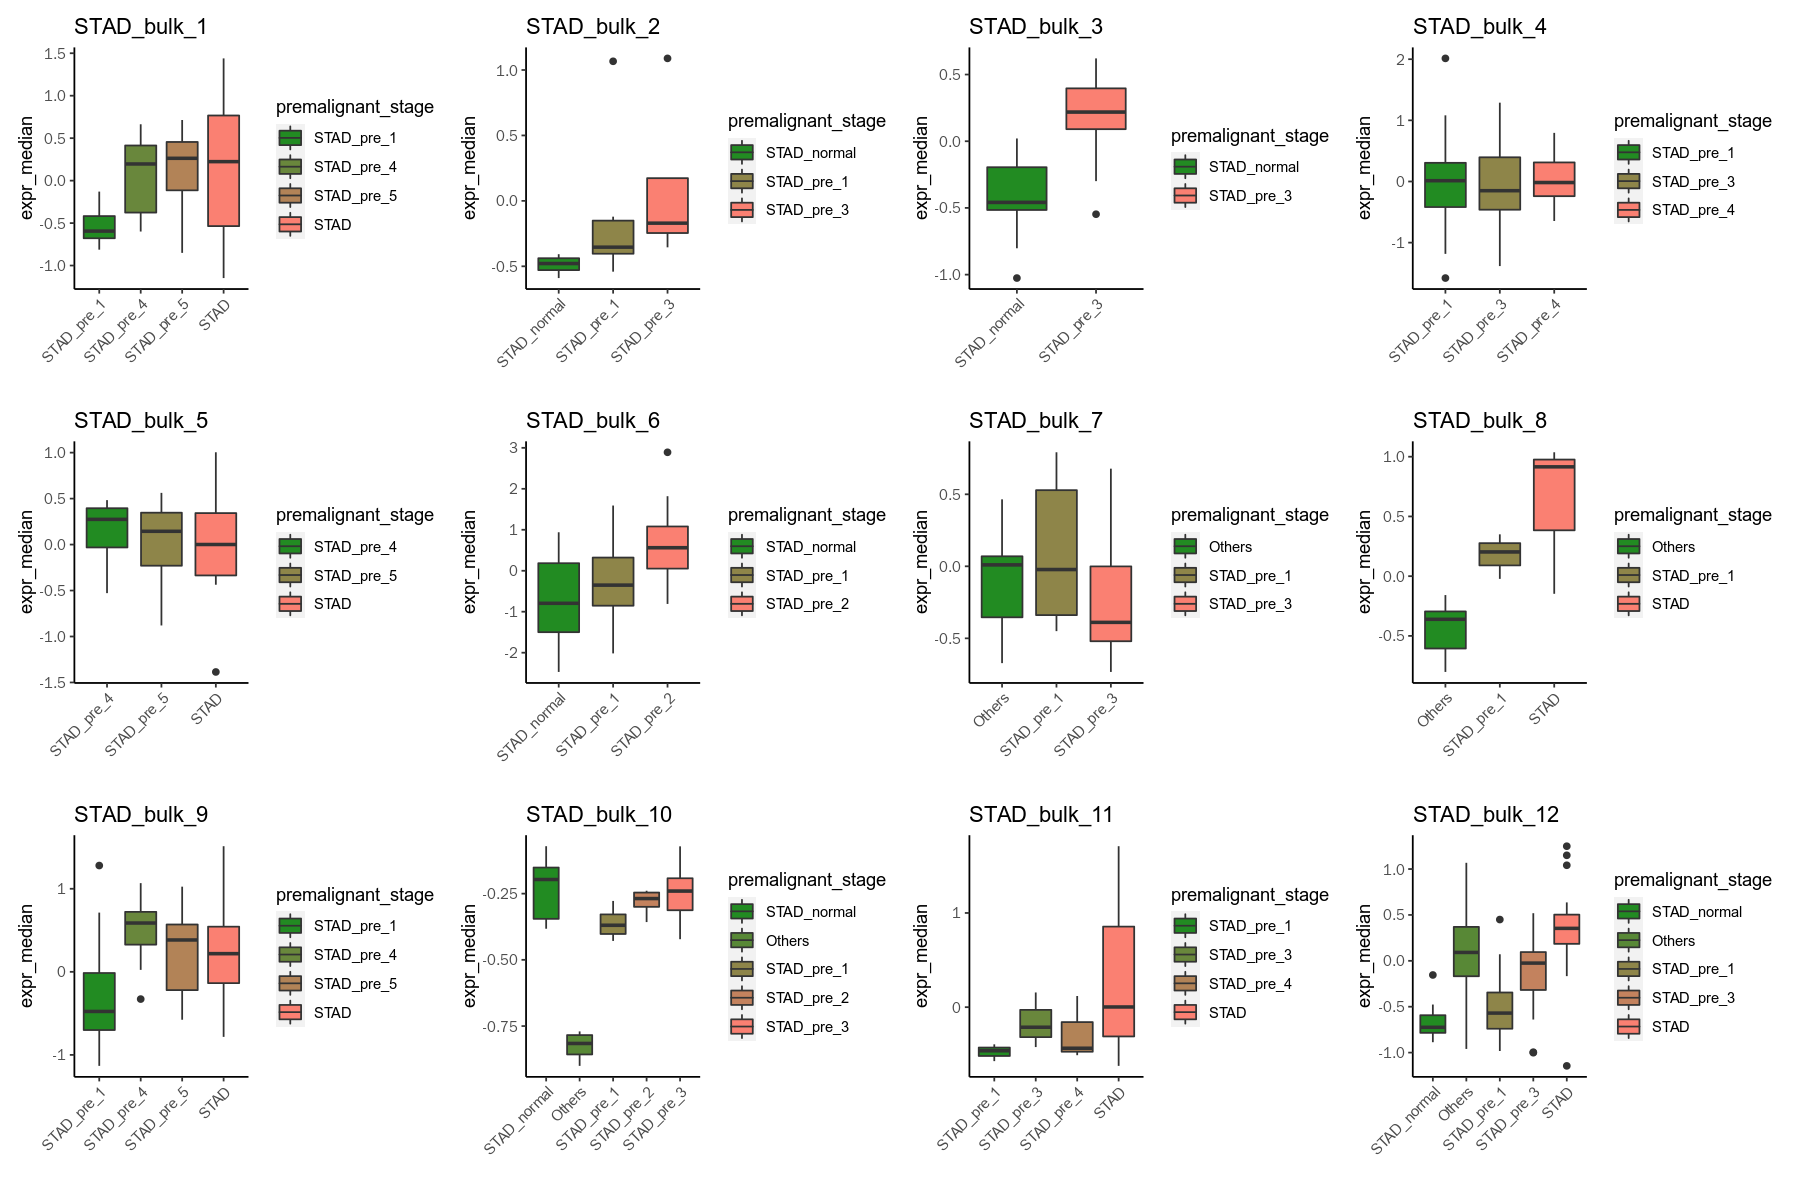

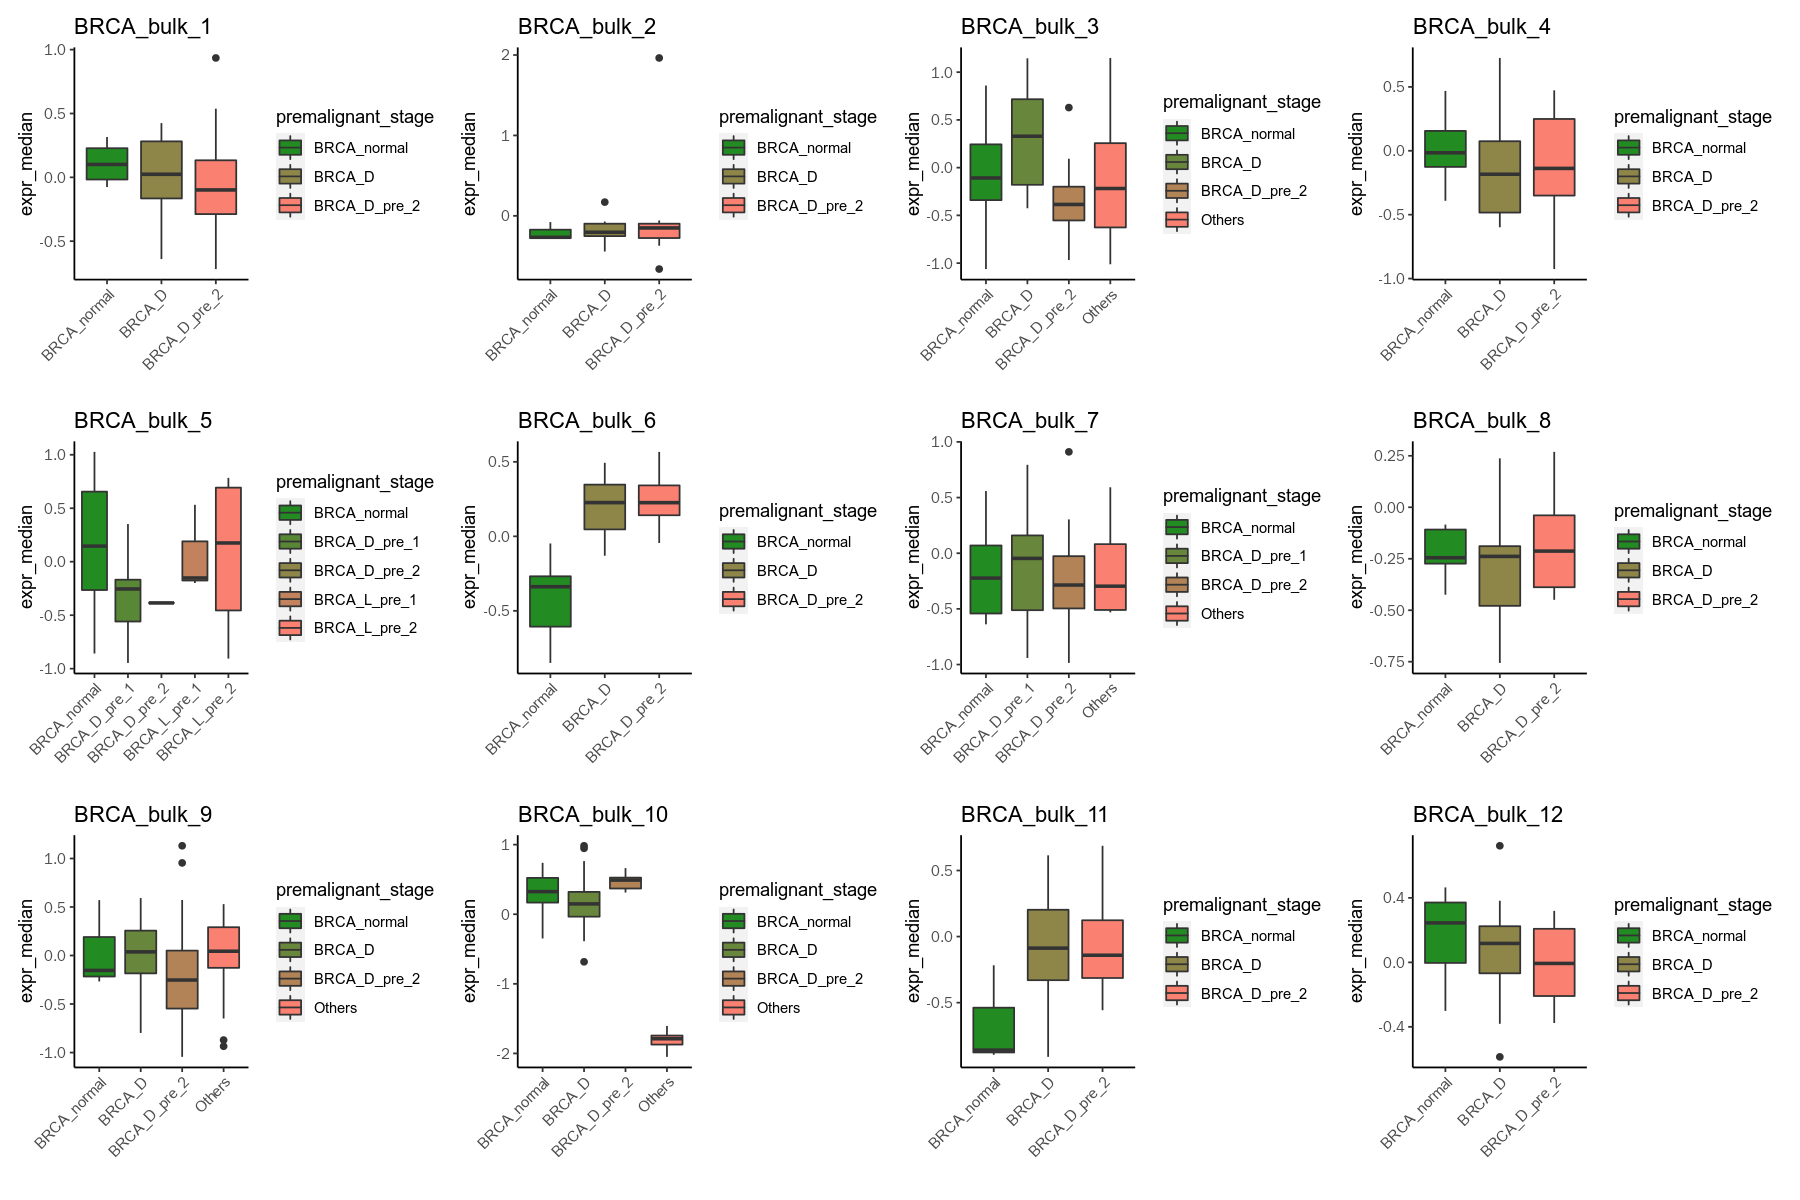

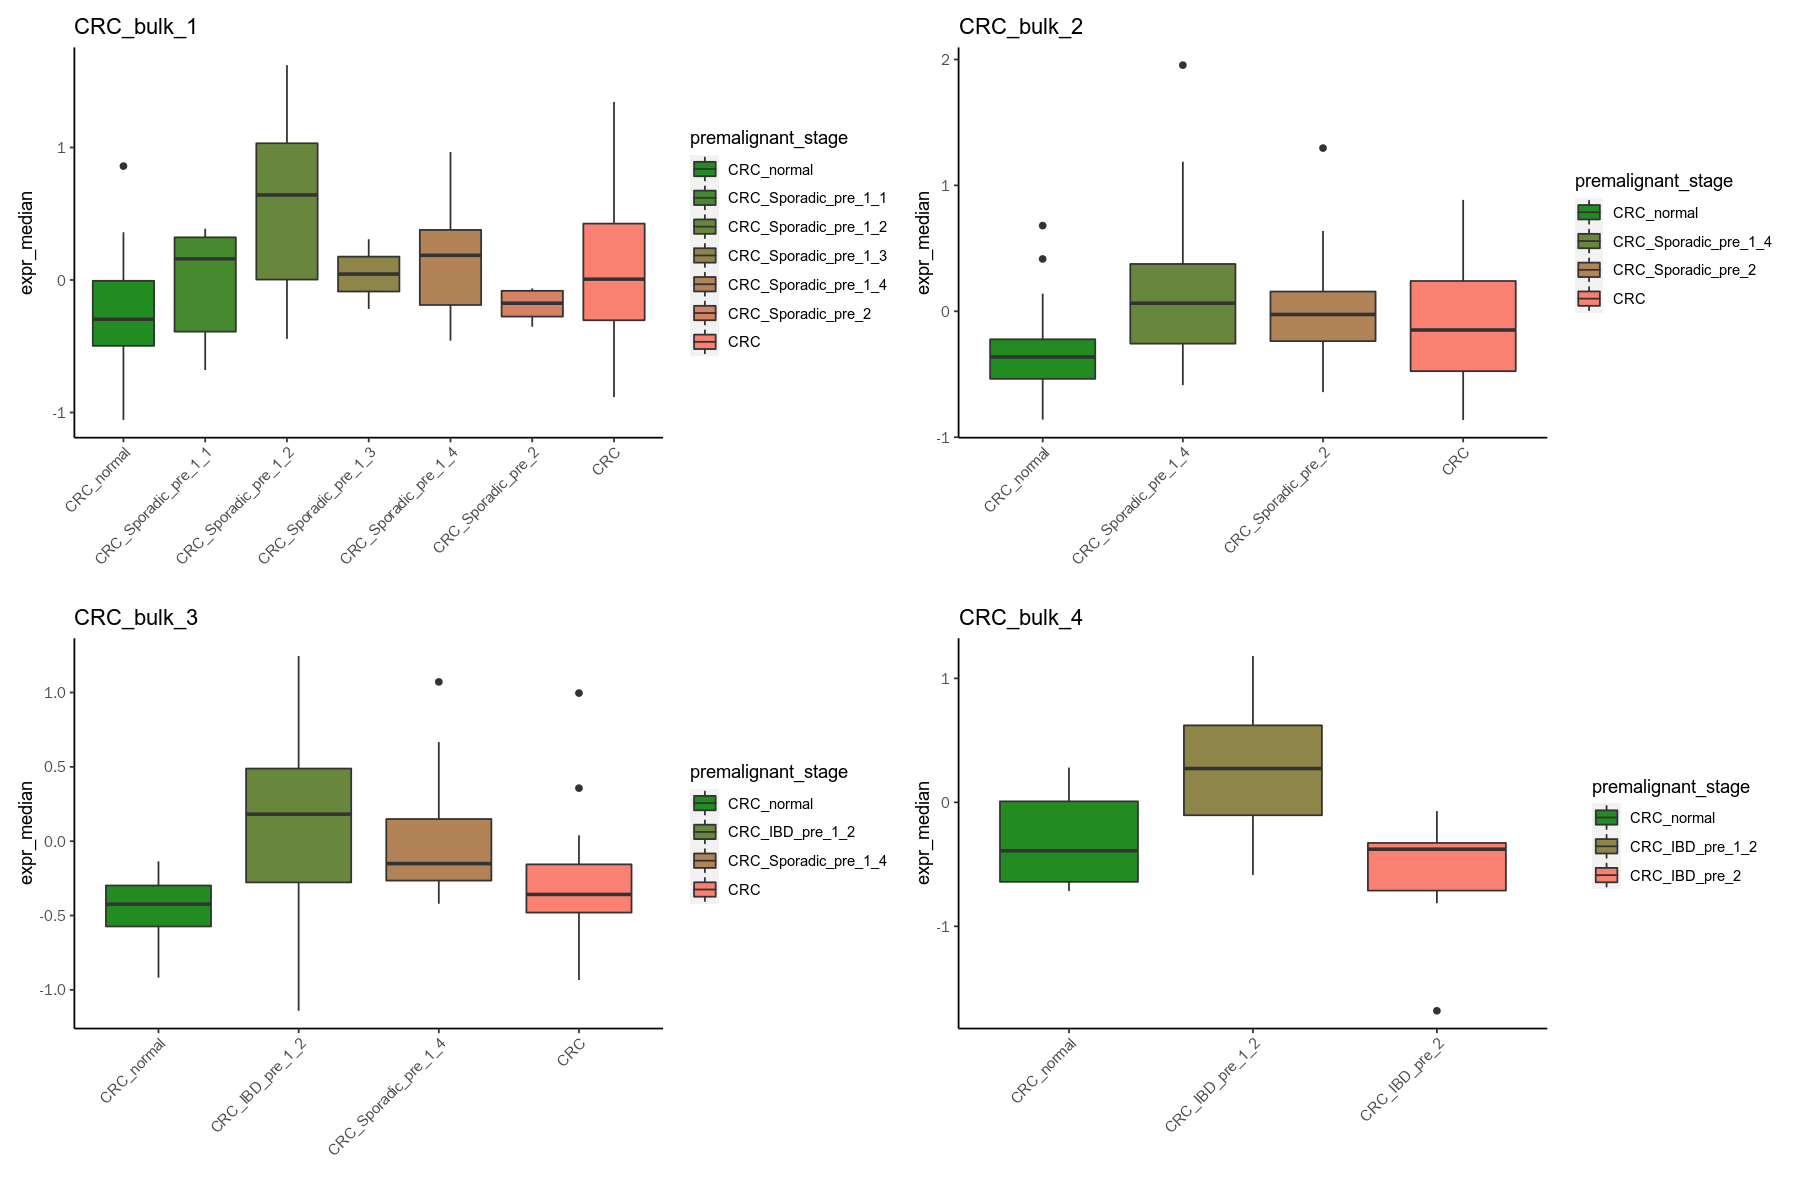

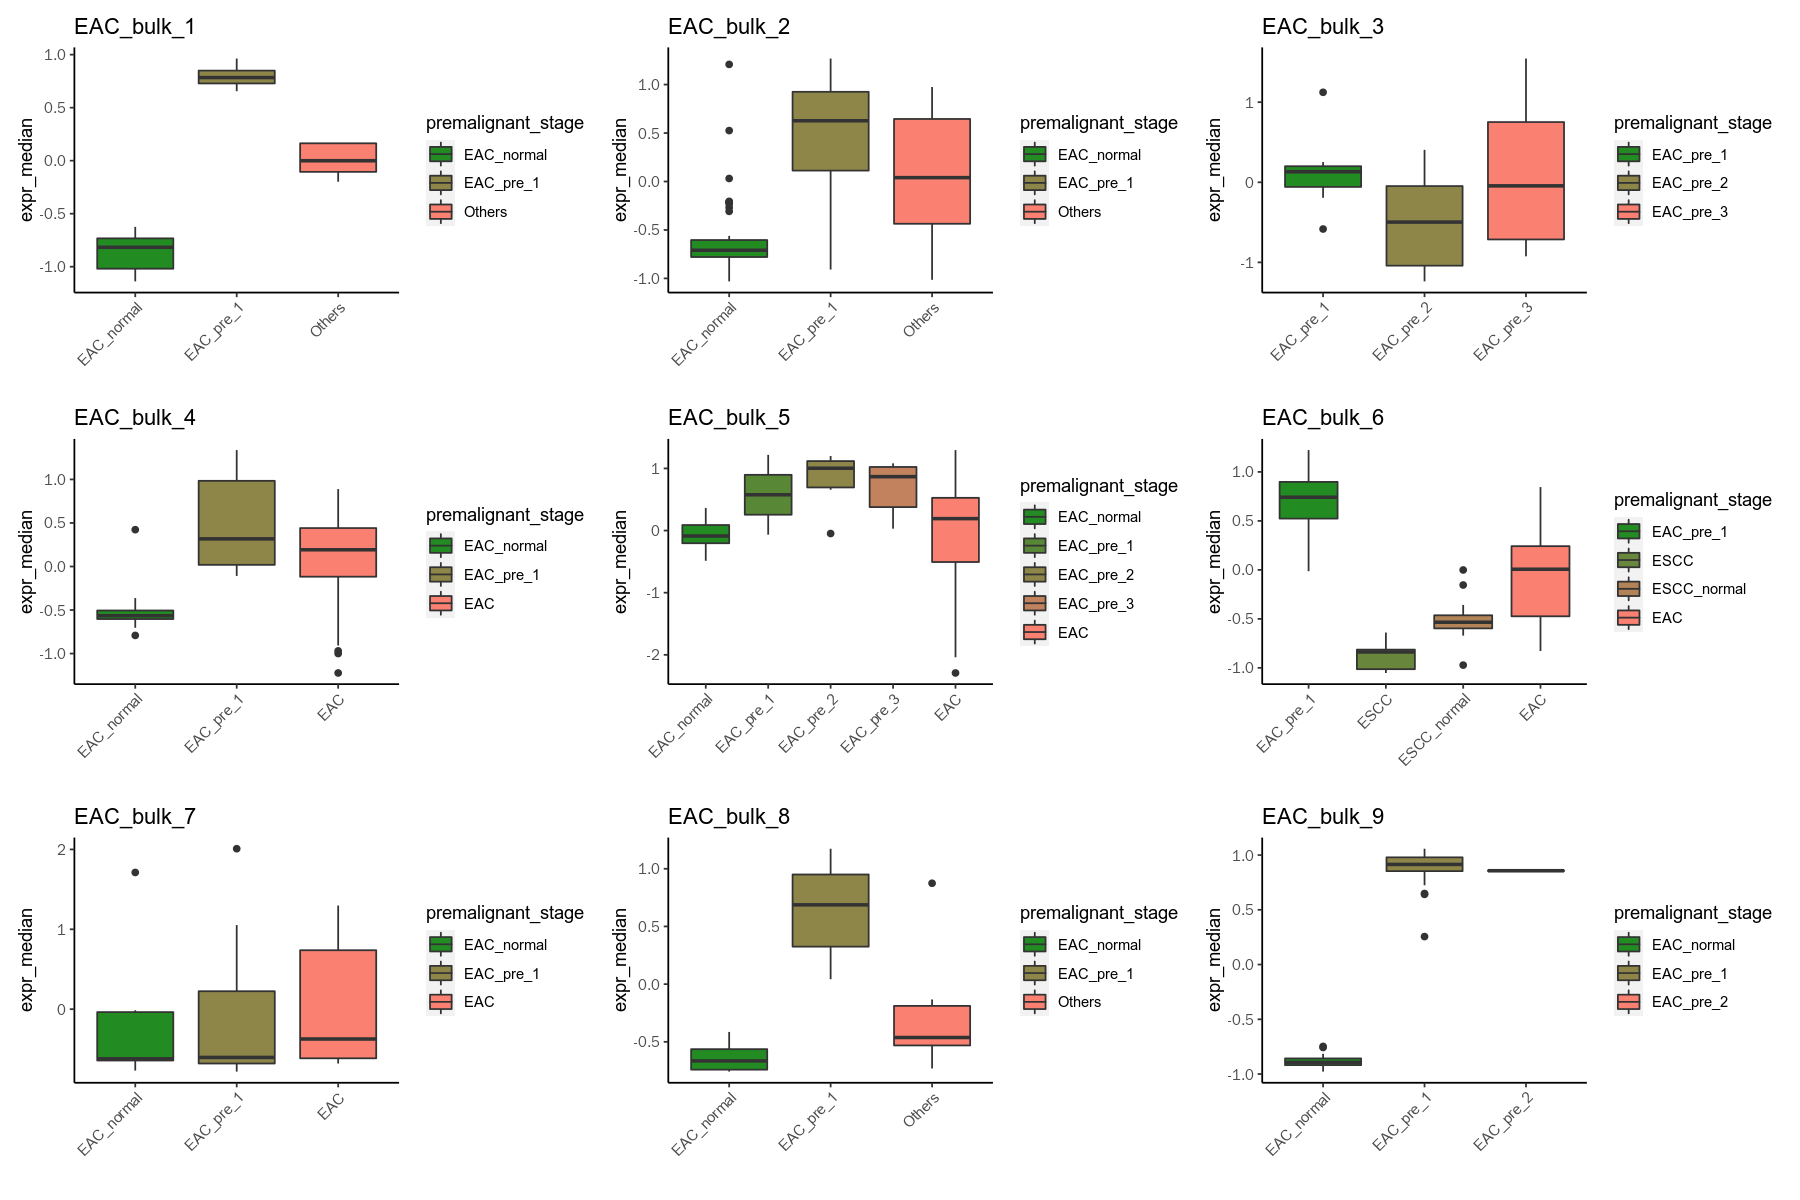

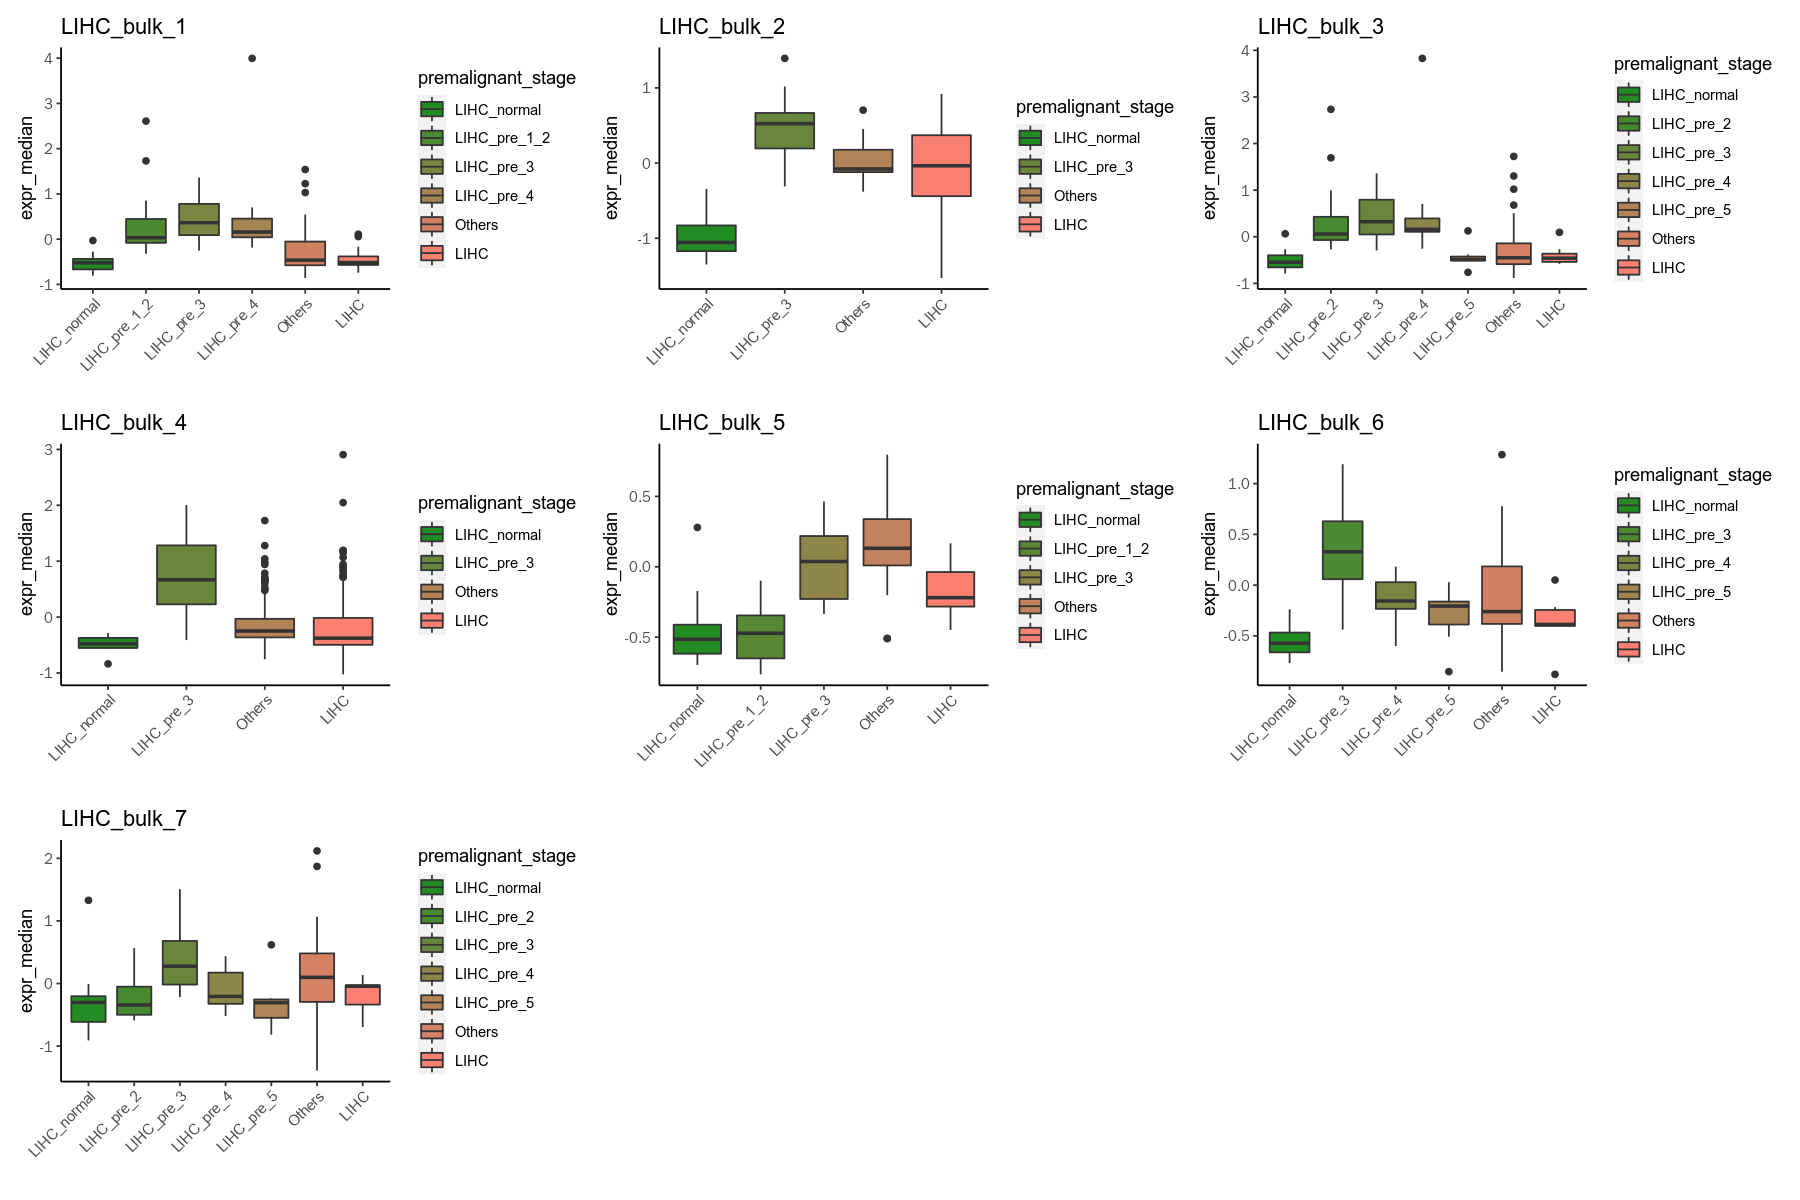

Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”


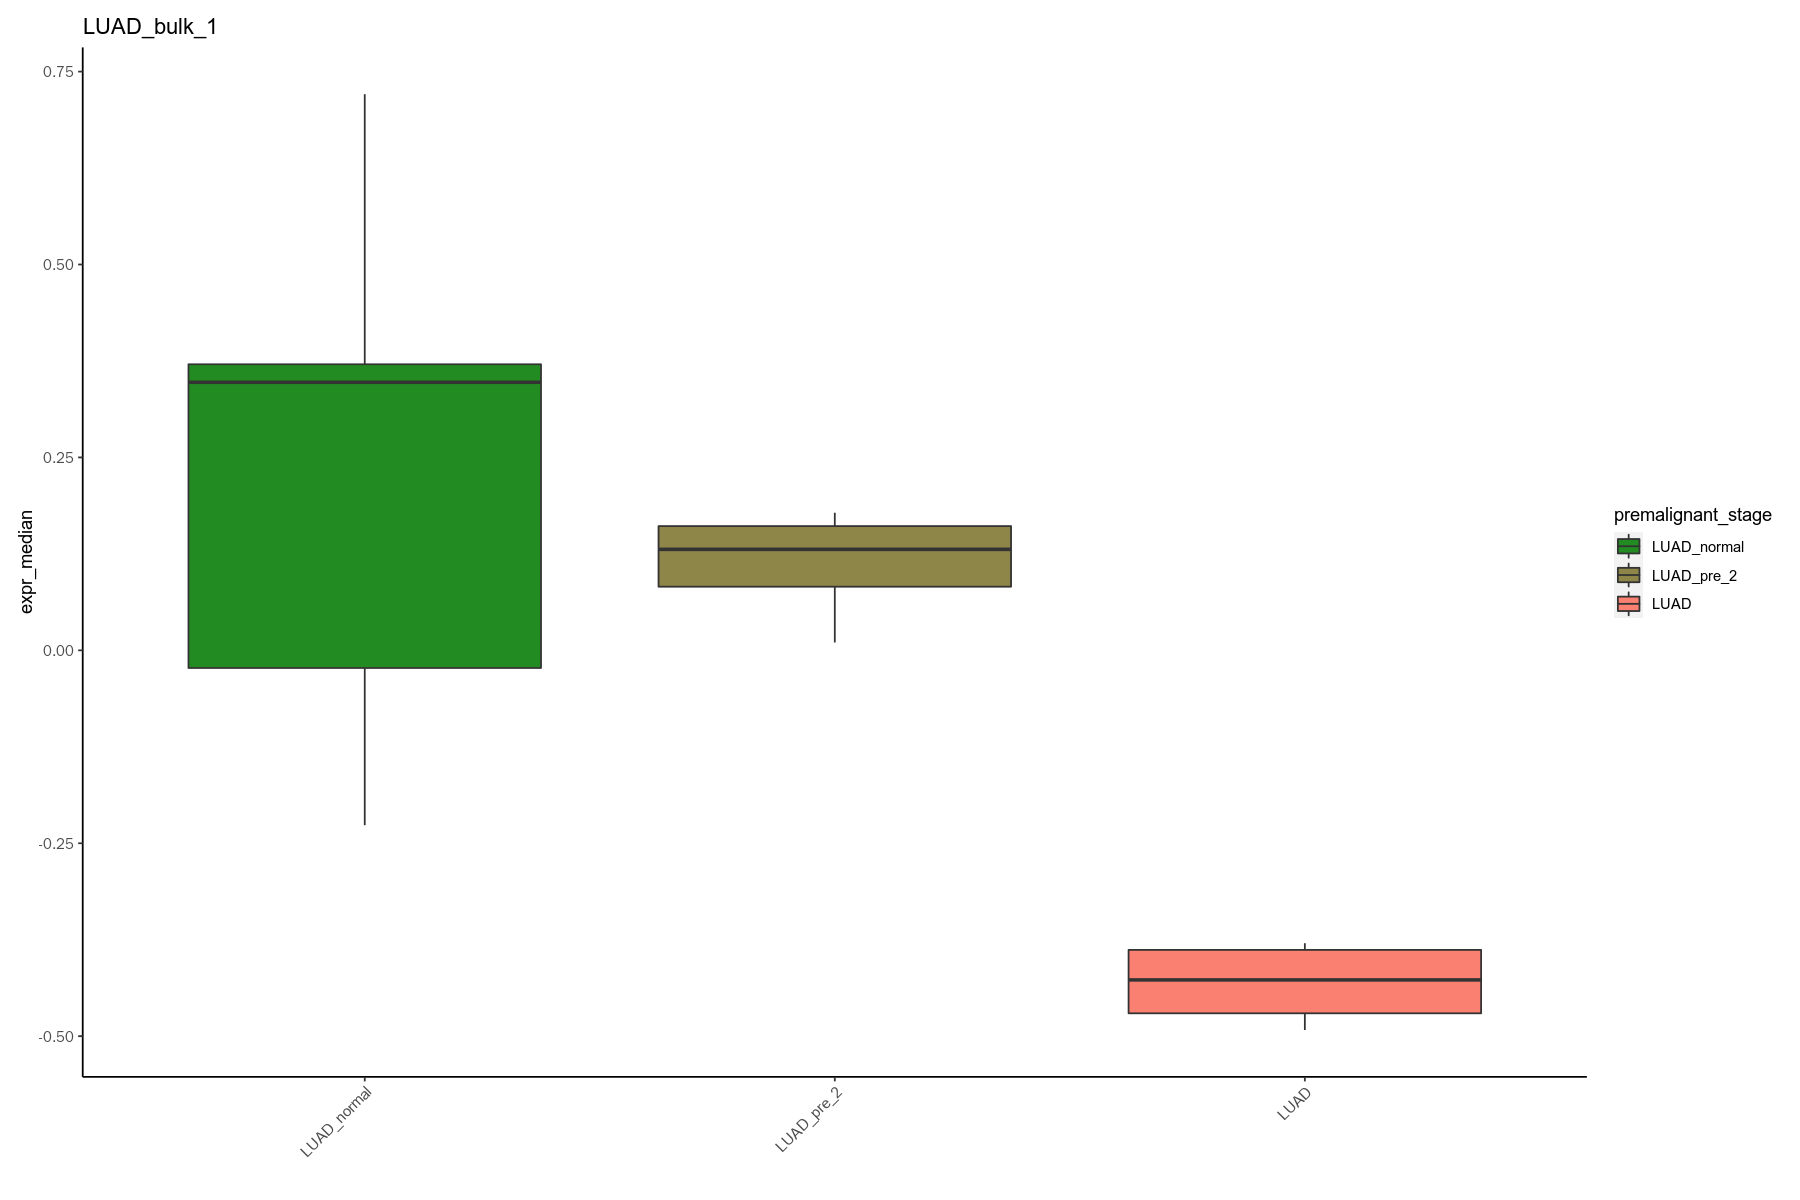

$STAD_M5

$BRCA_M4

$CRC_M9

$EAC_M1

$LIHC_M2

$LUAD_M1

$PDAC_M4

$PRAD_M6


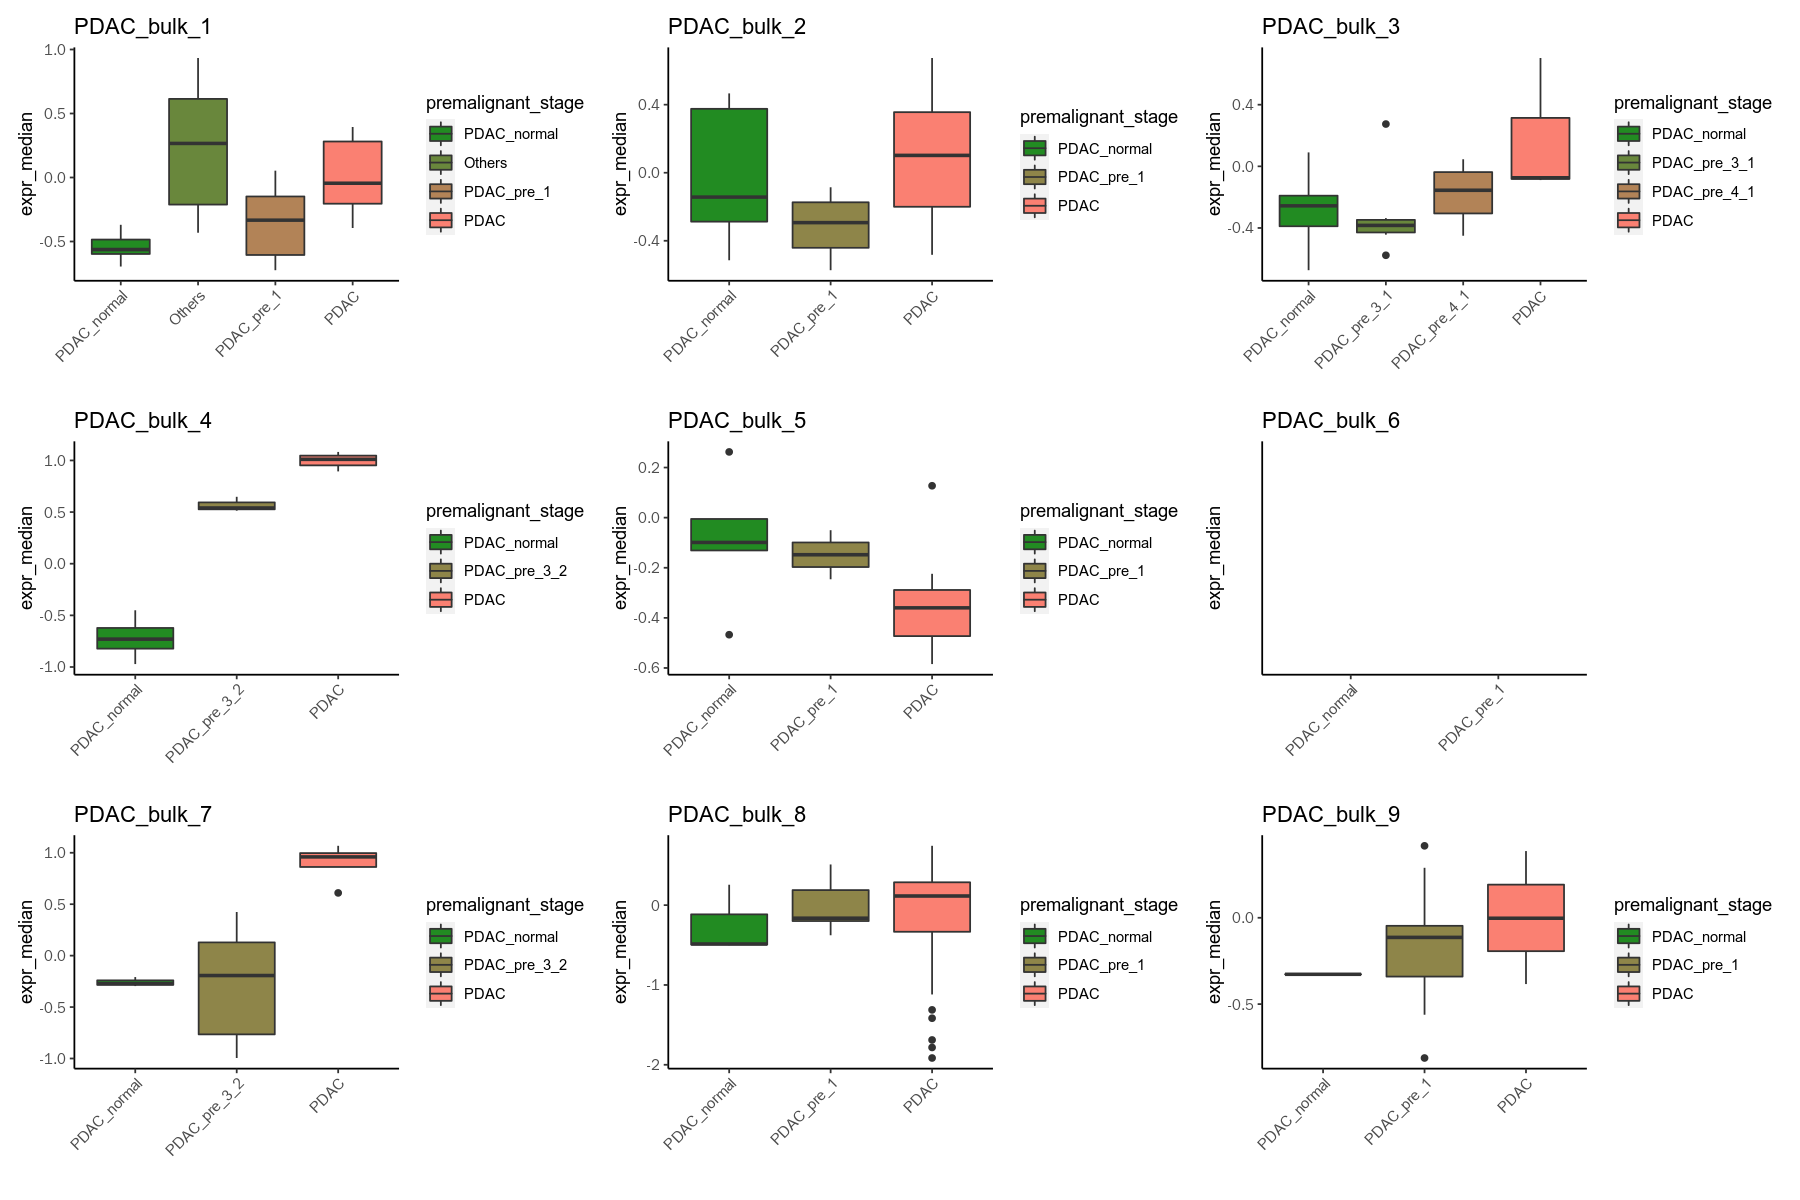

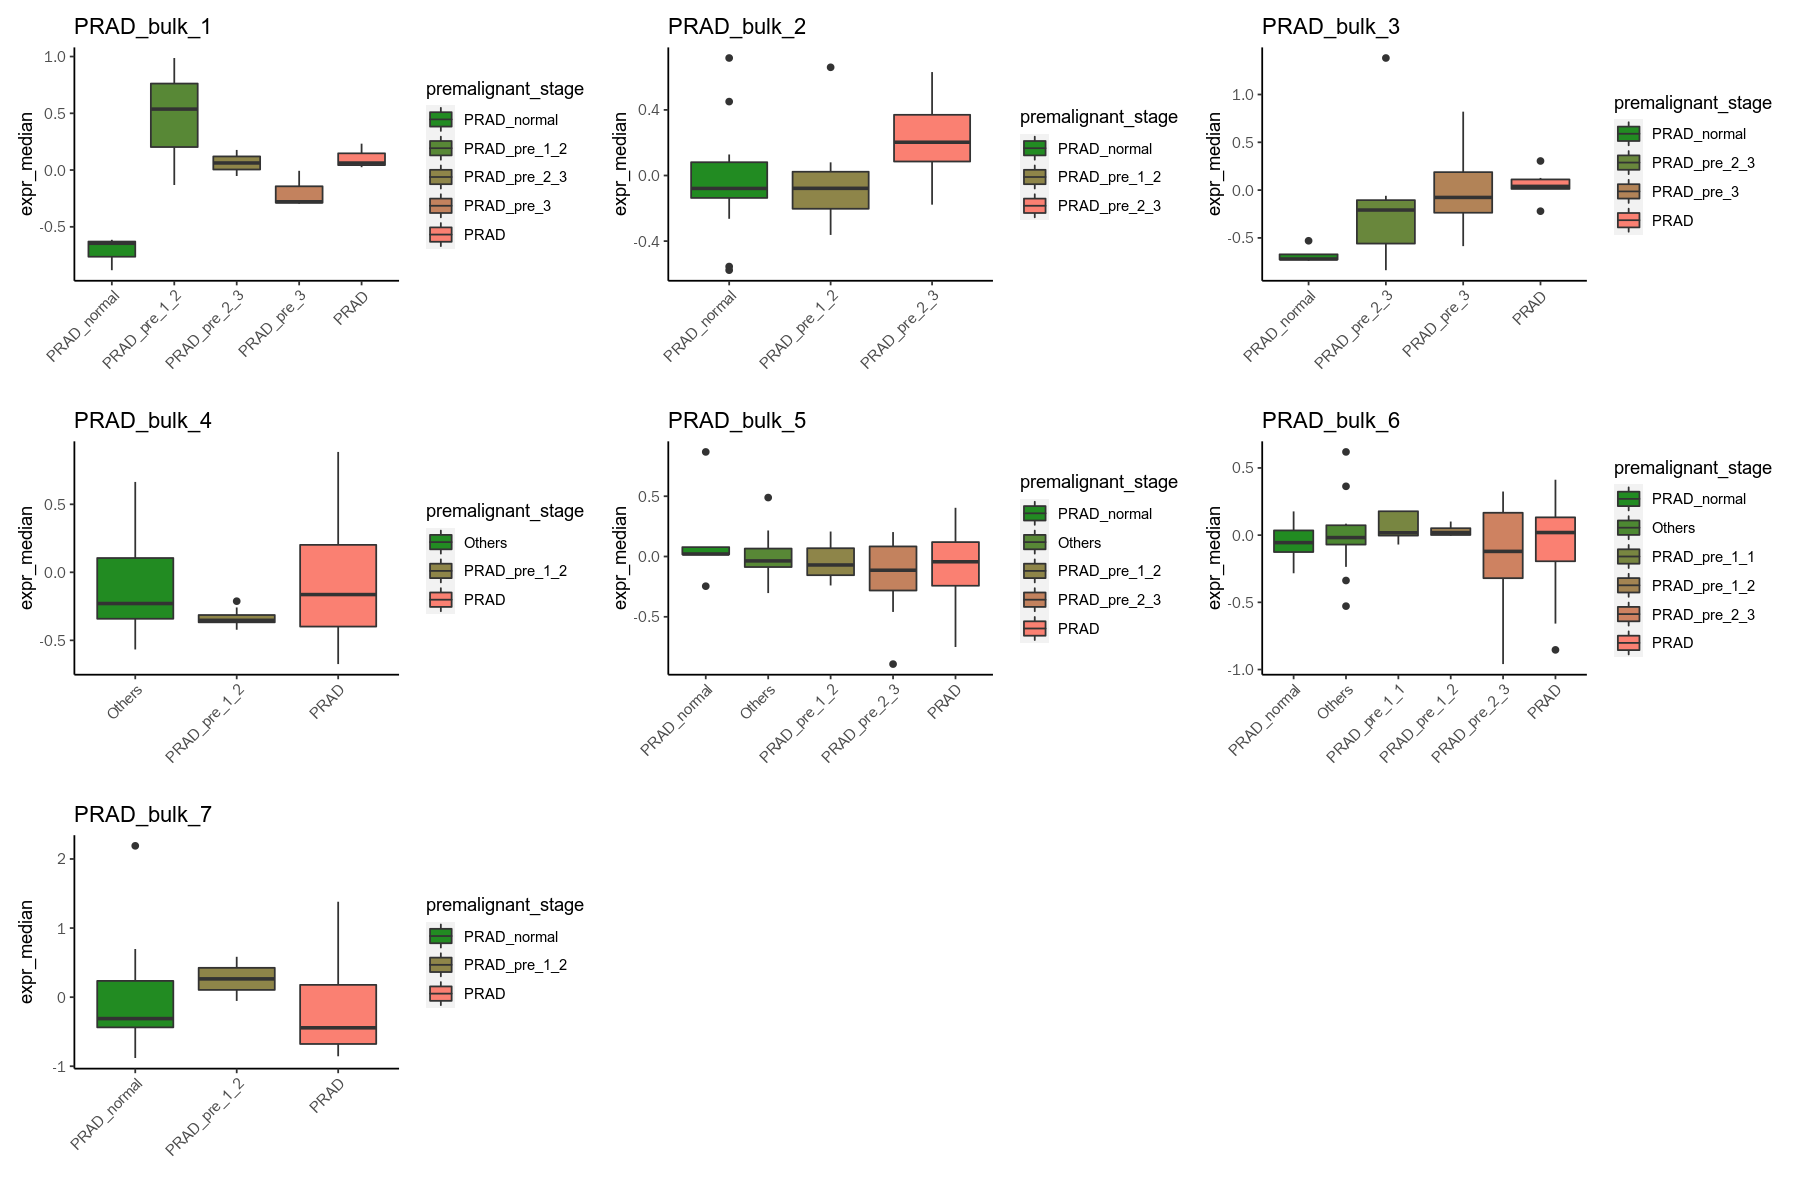

In [117]:
options(repr.plot.height = 10, repr.plot.width = 15)
map(median.plot, wrap_plots)

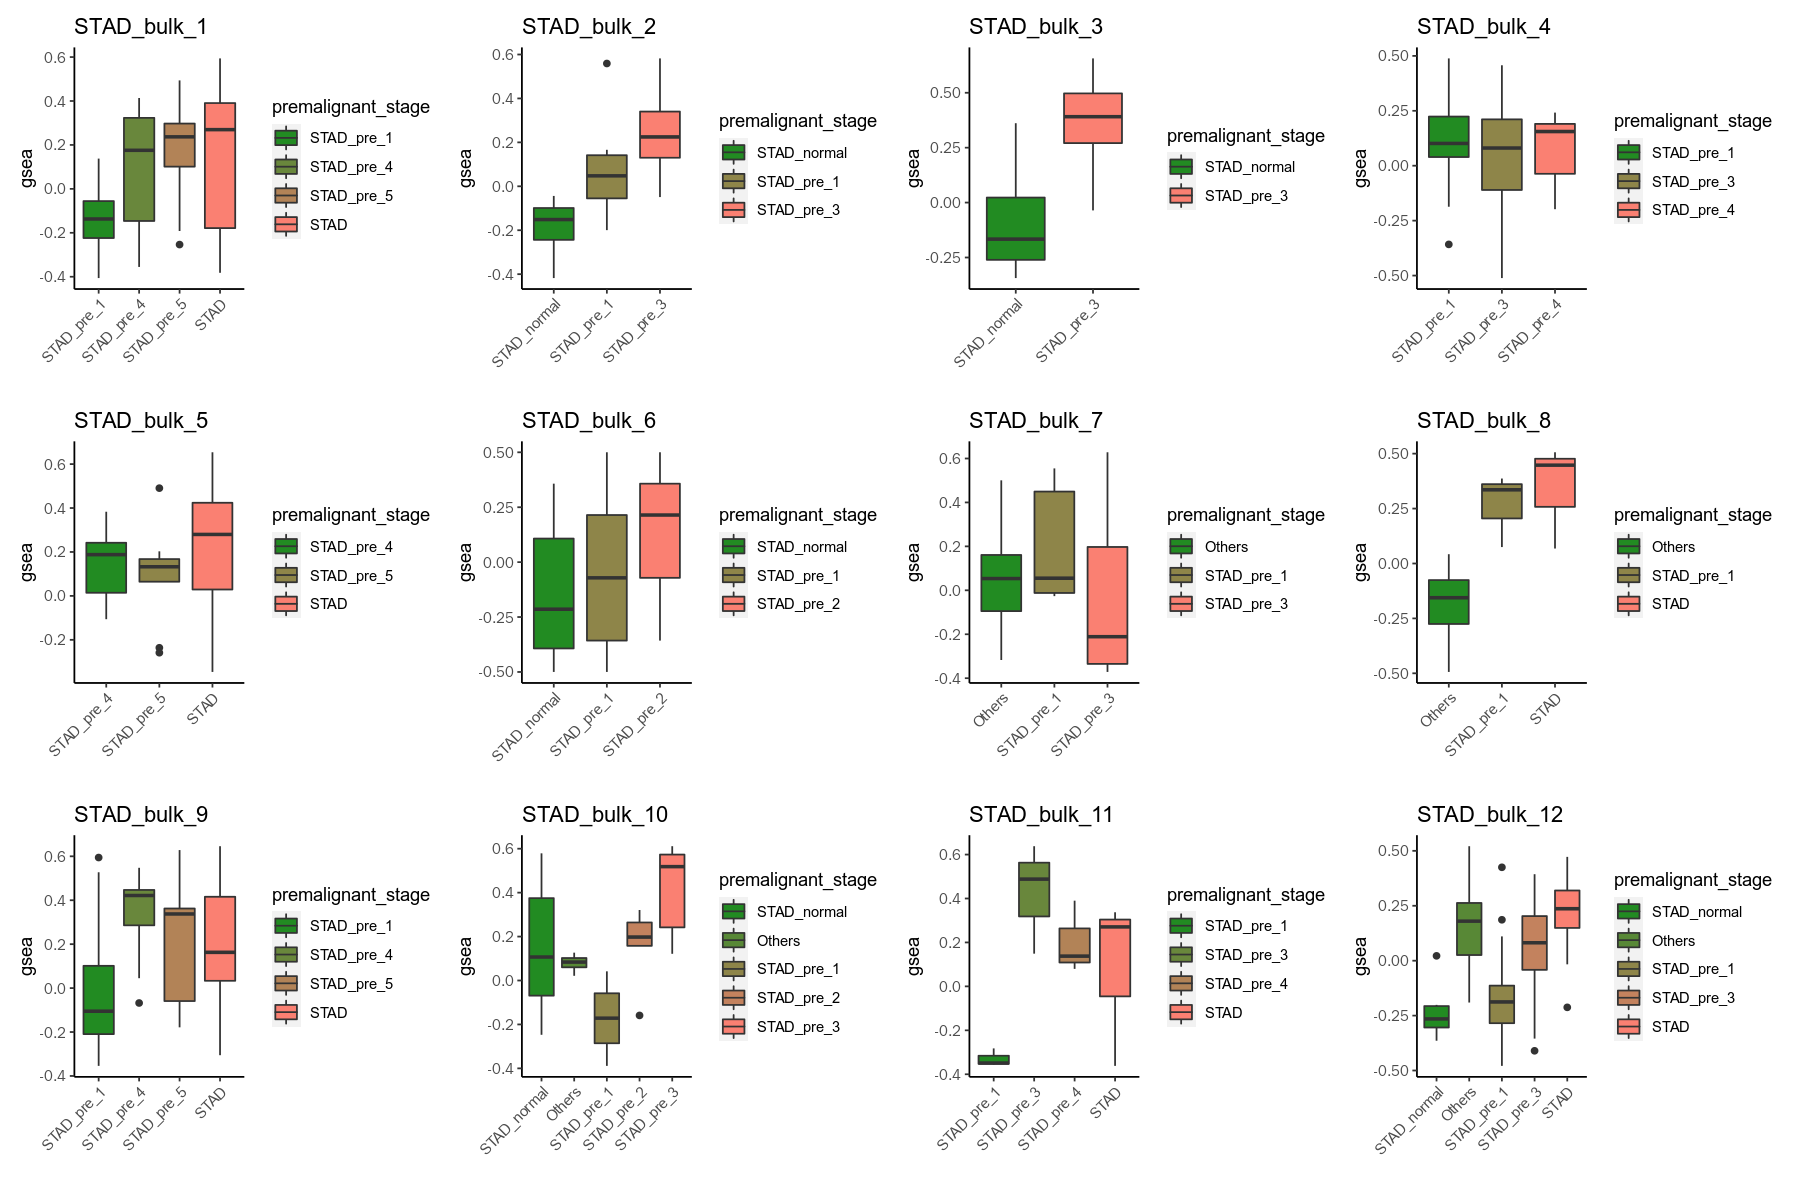

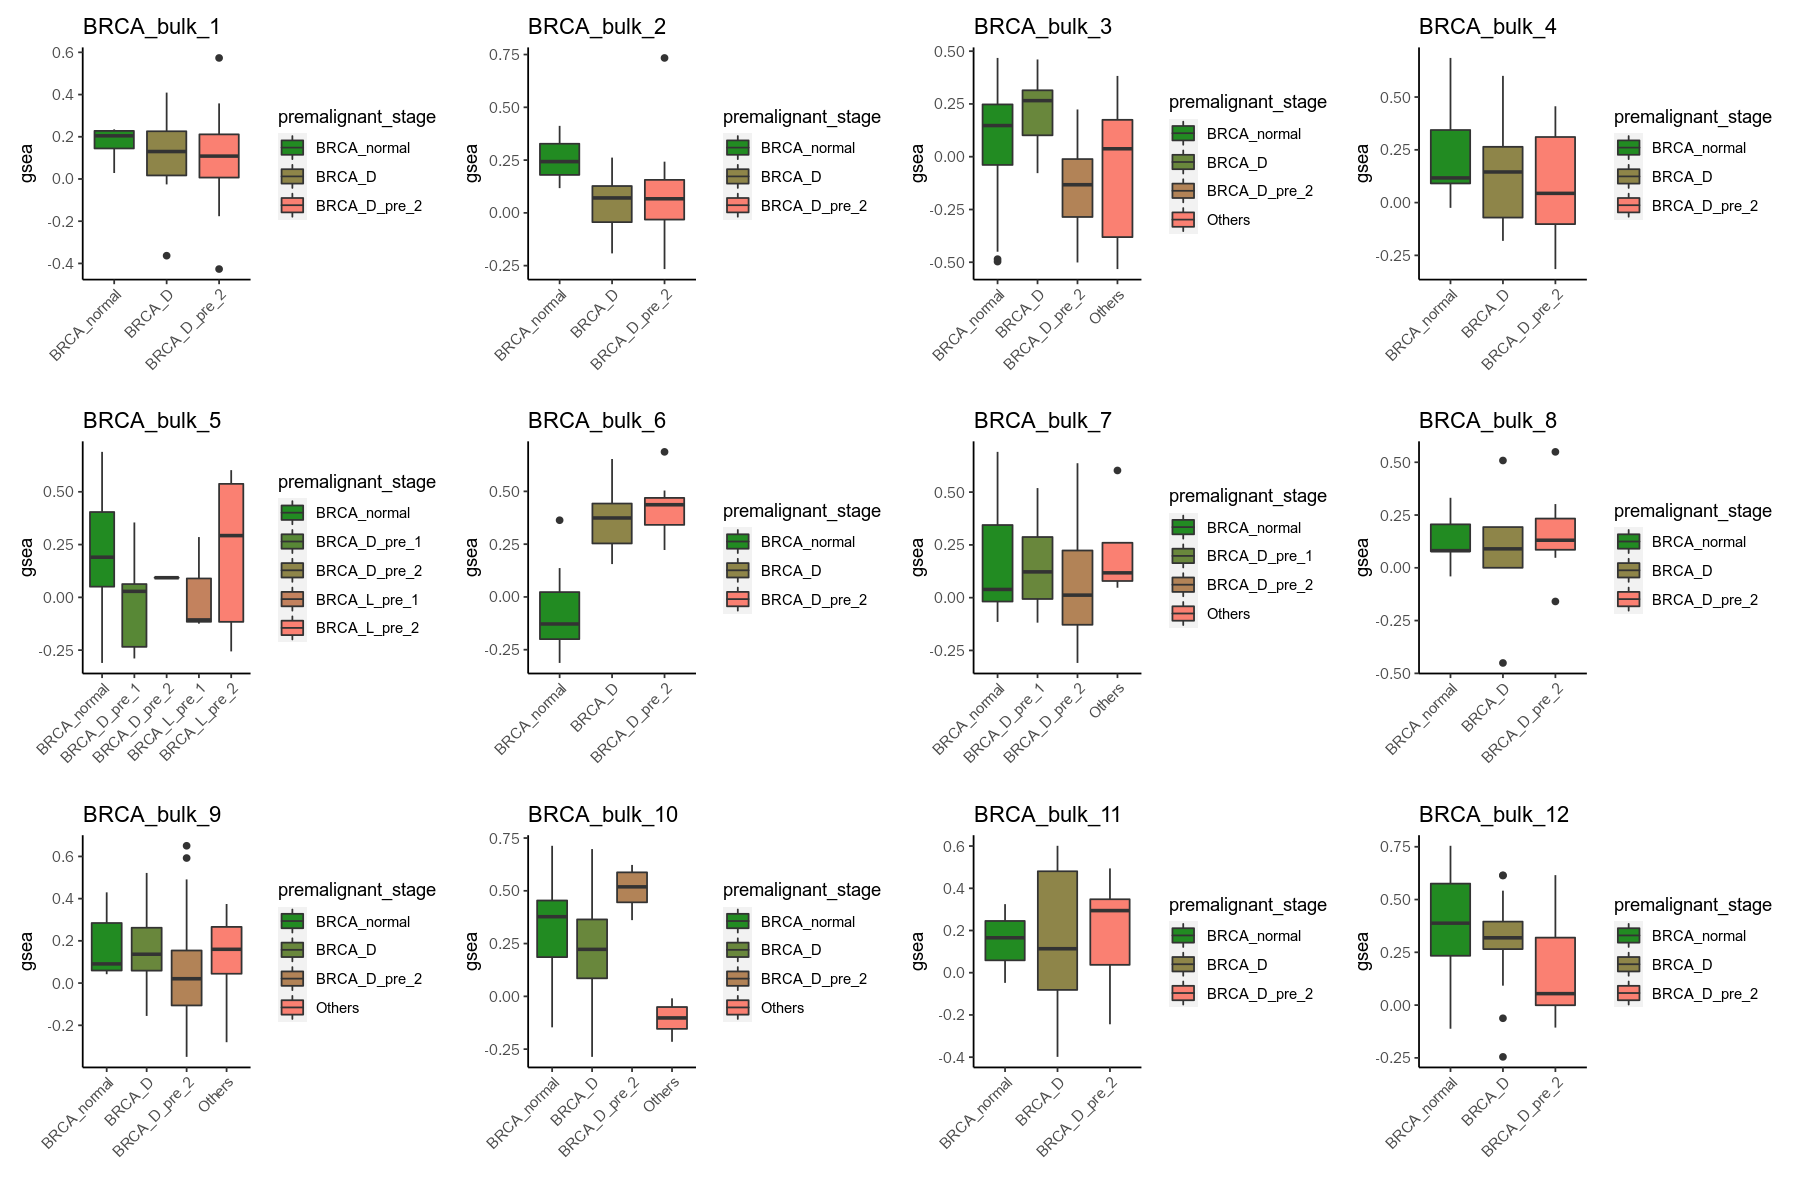

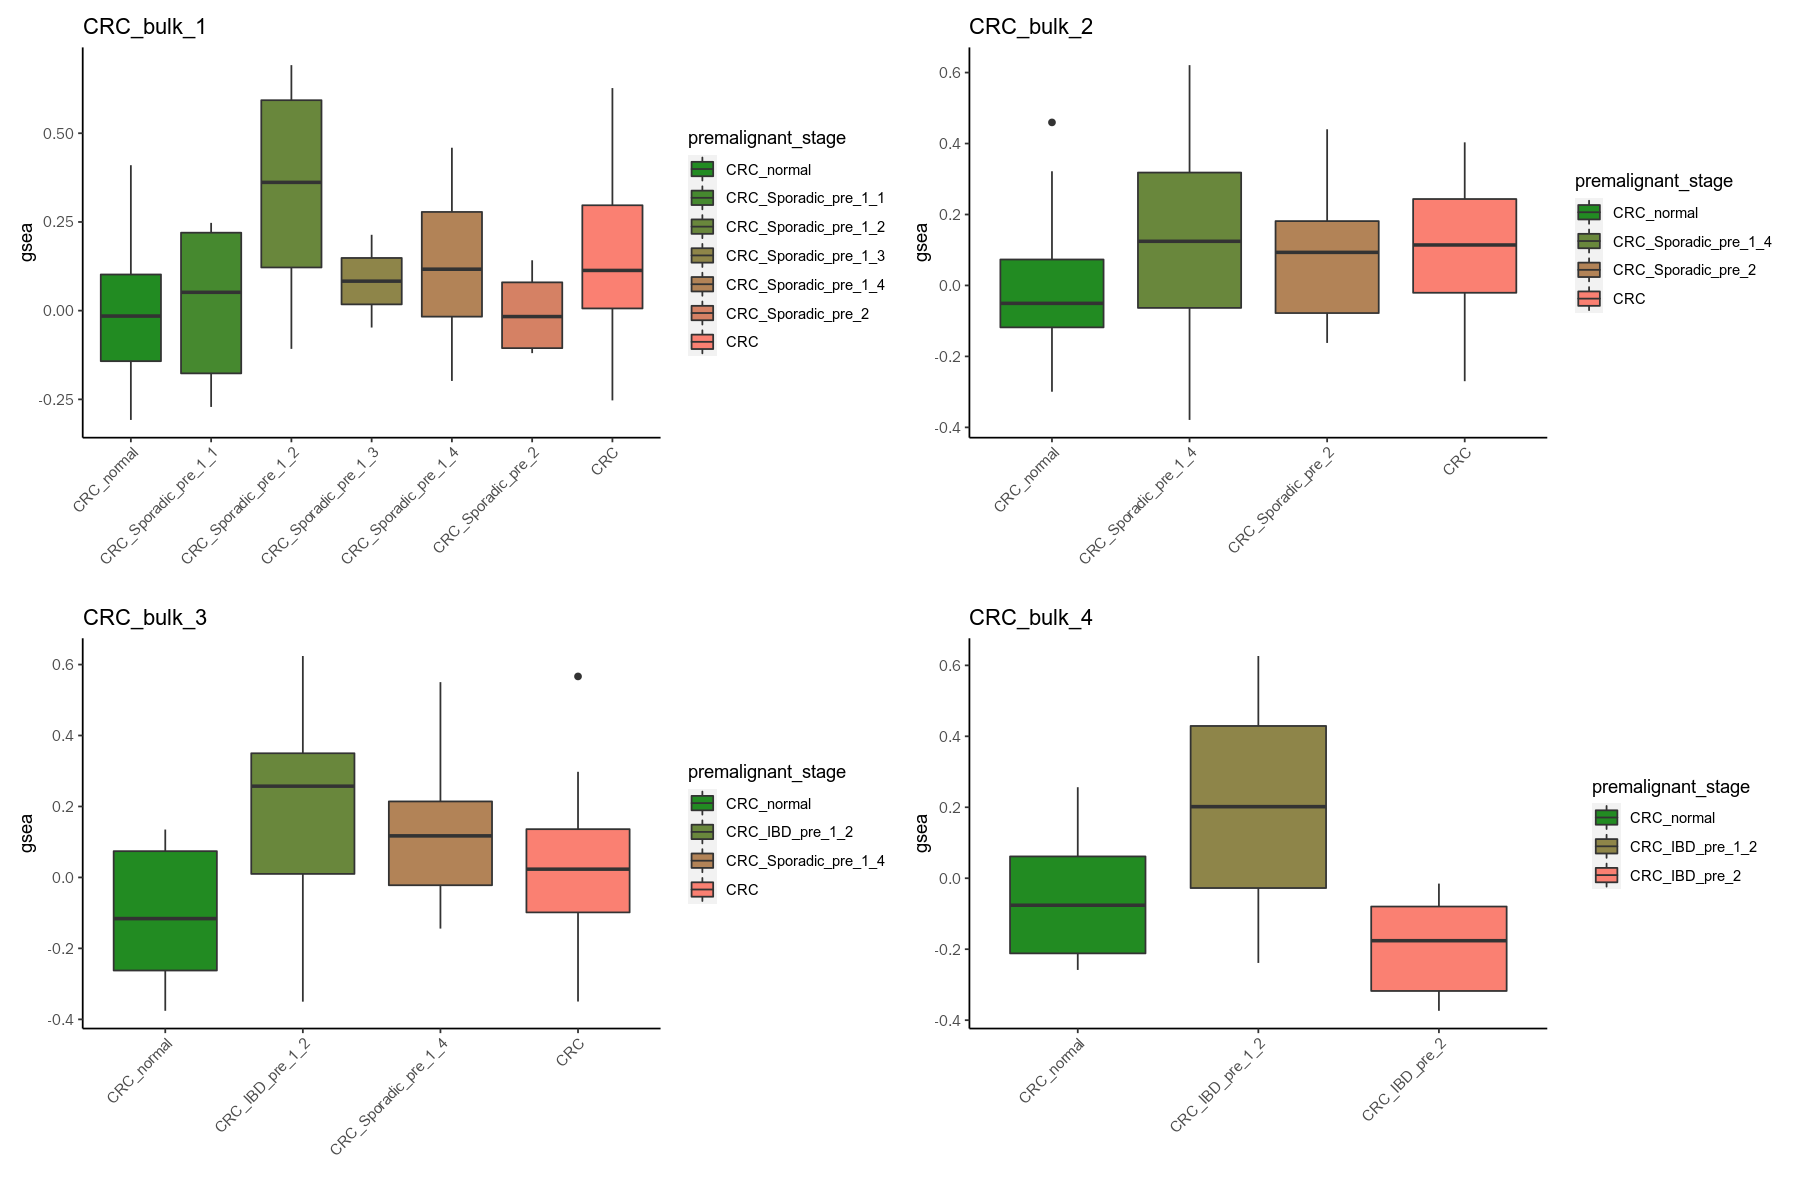

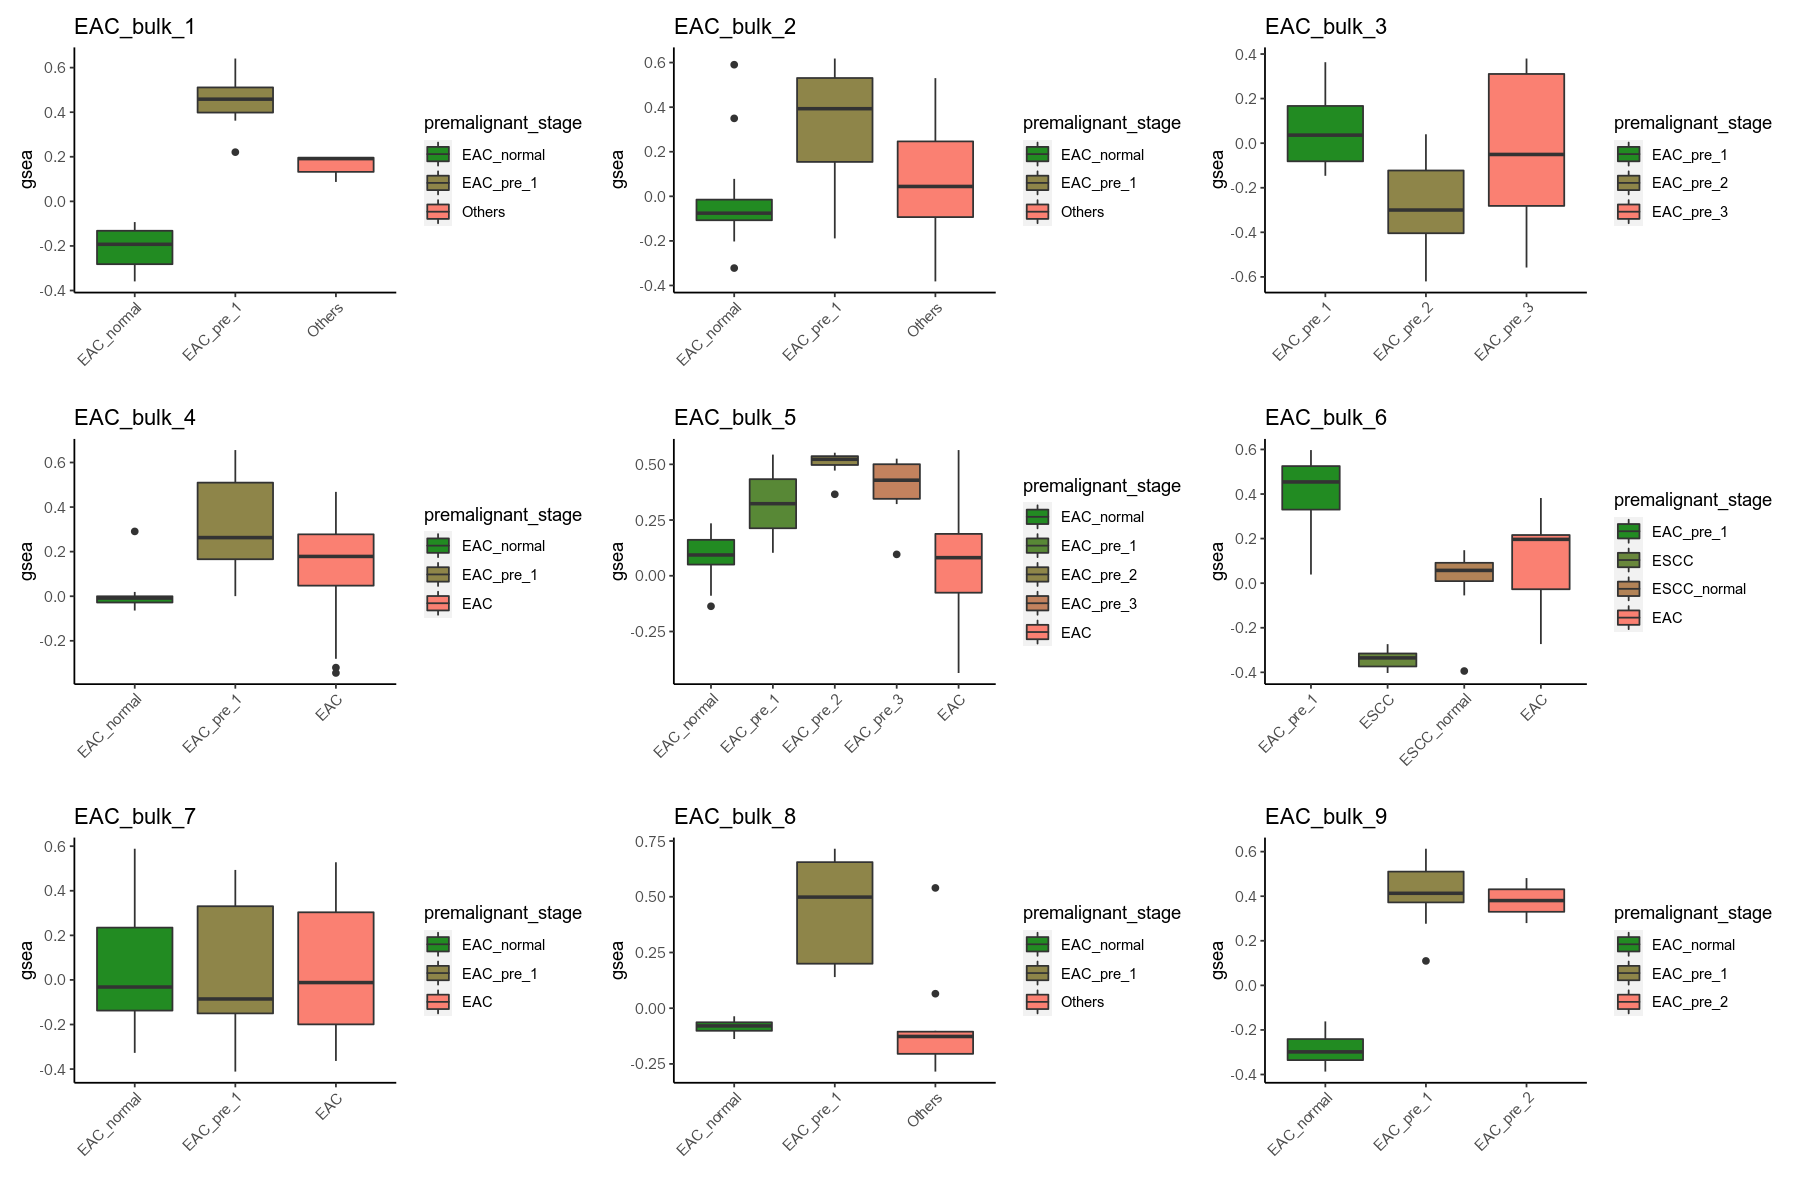

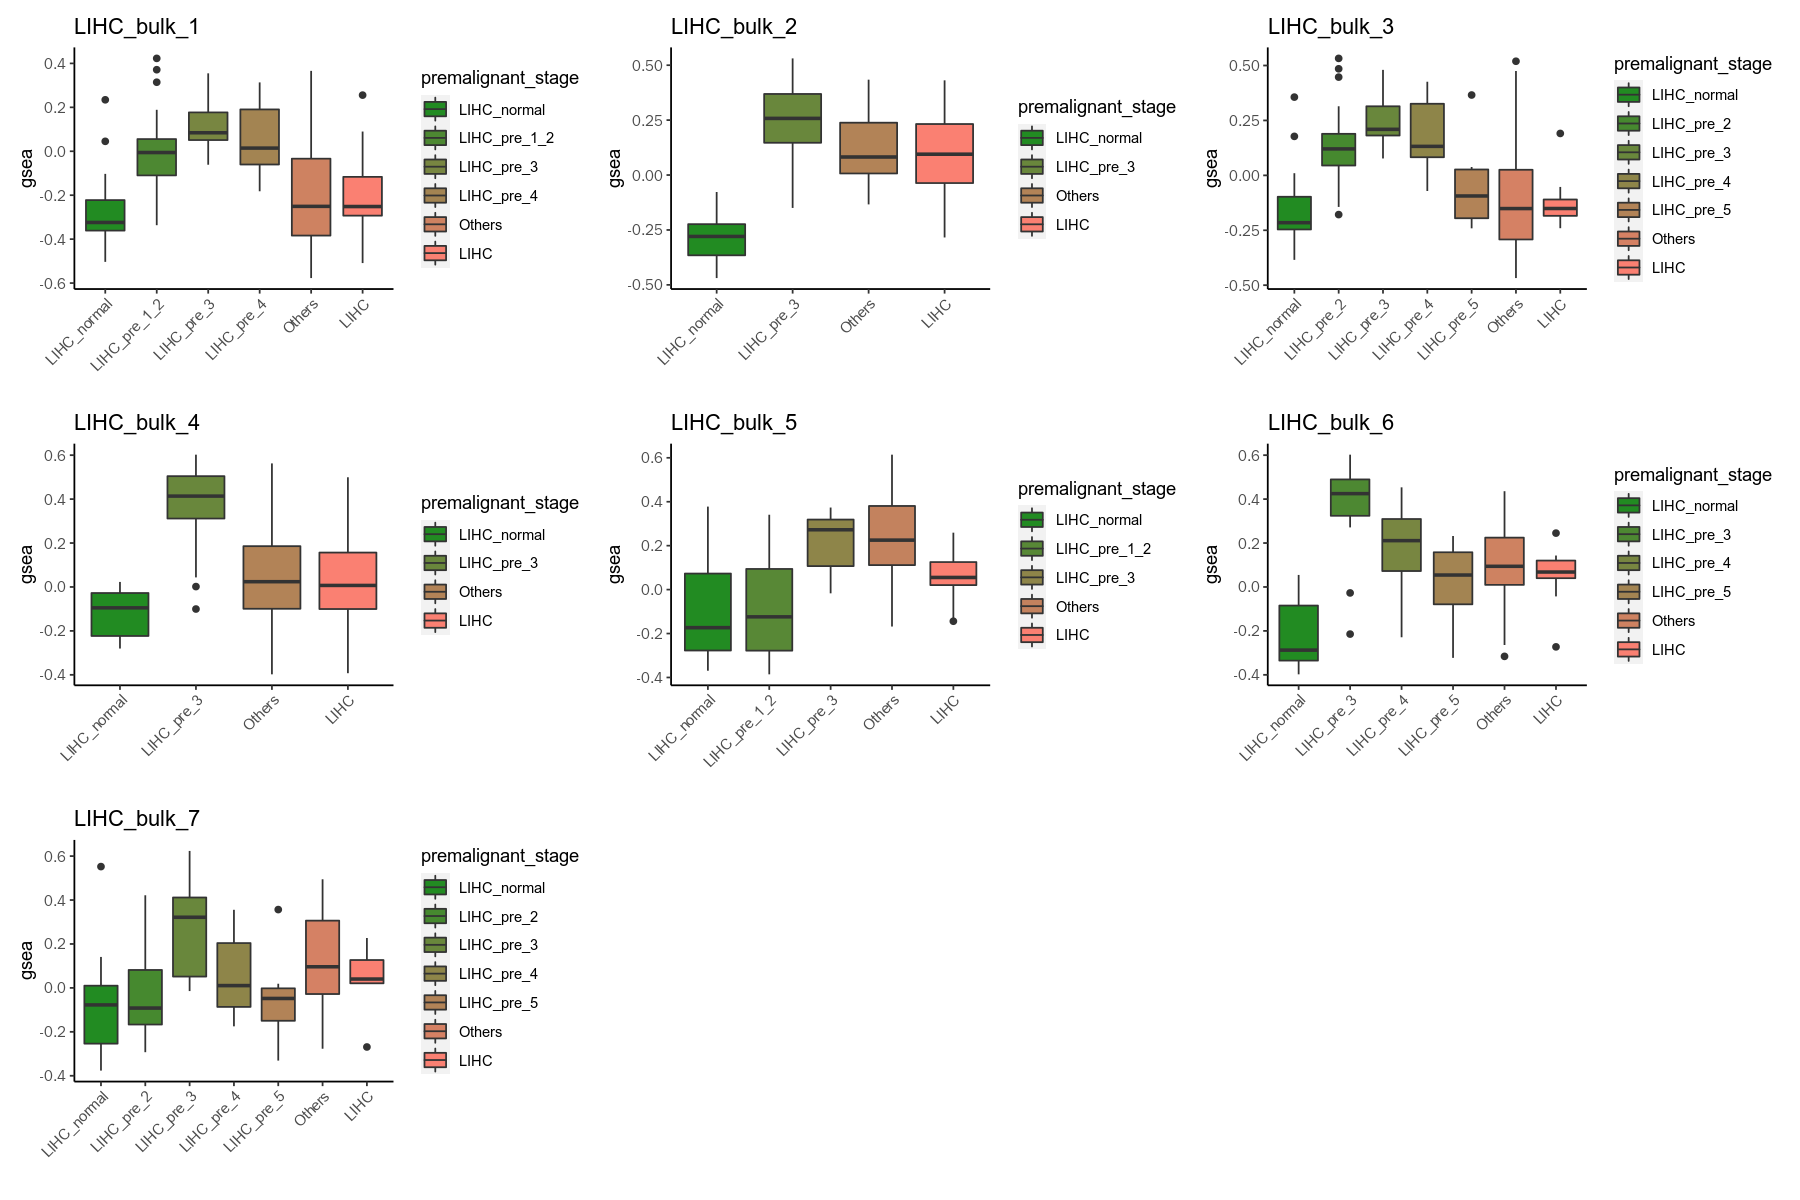

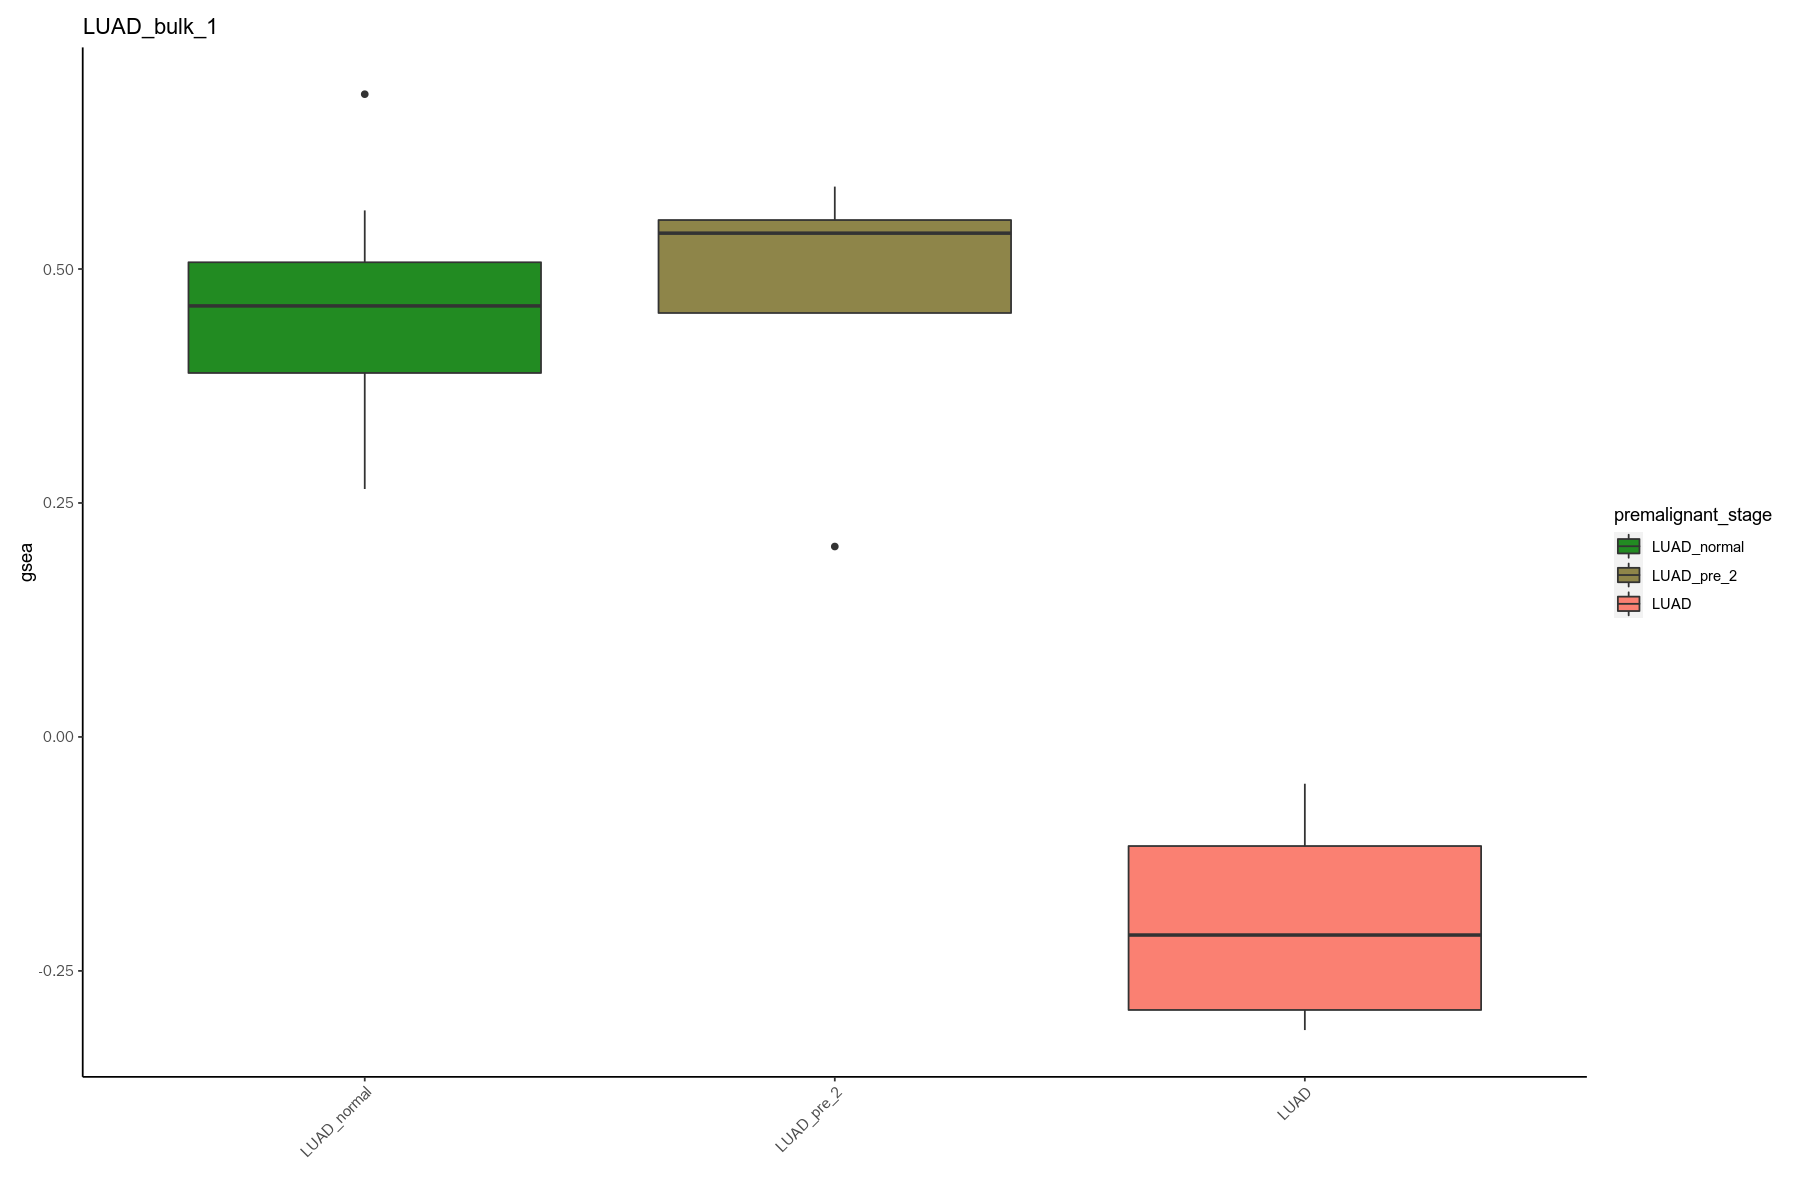

$STAD_M5

$BRCA_M4

$CRC_M9

$EAC_M1

$LIHC_M2

$LUAD_M1

$PDAC_M4

$PRAD_M6


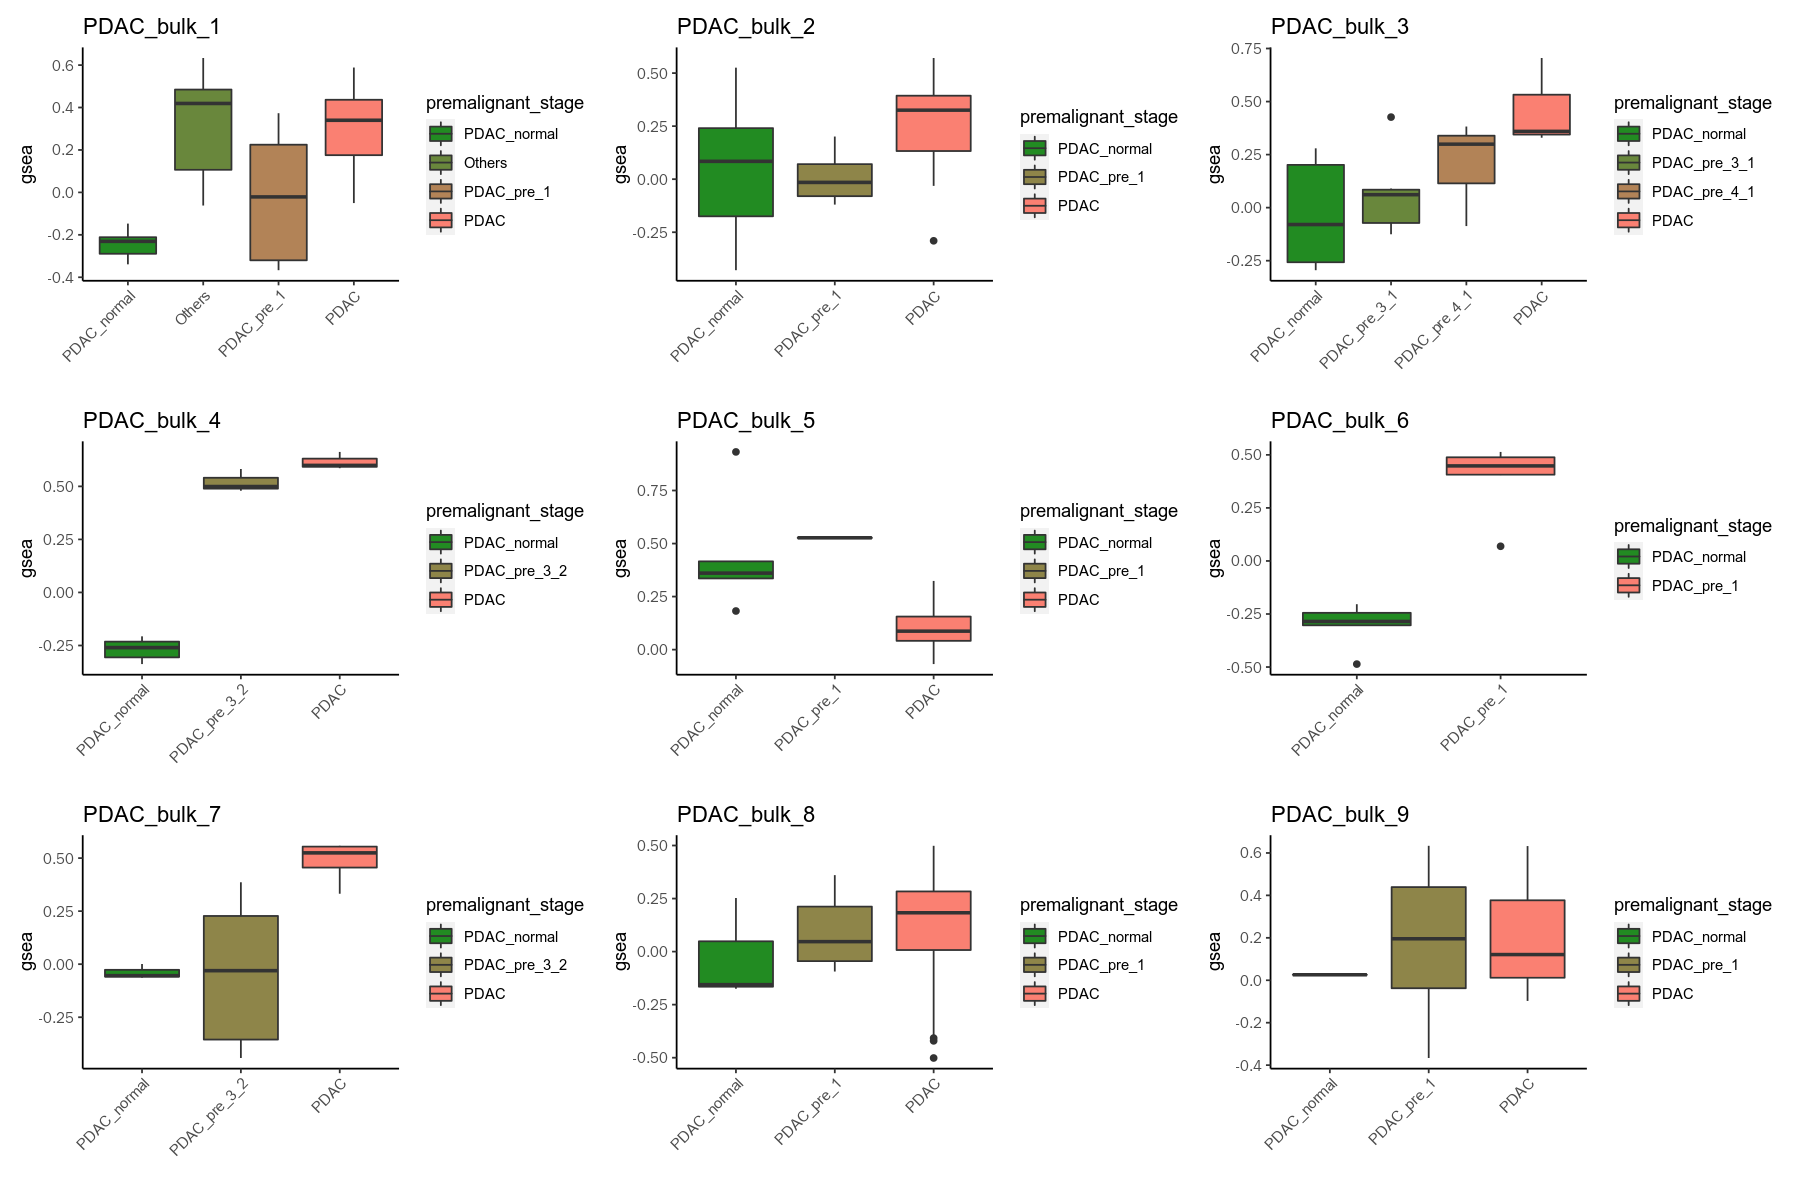

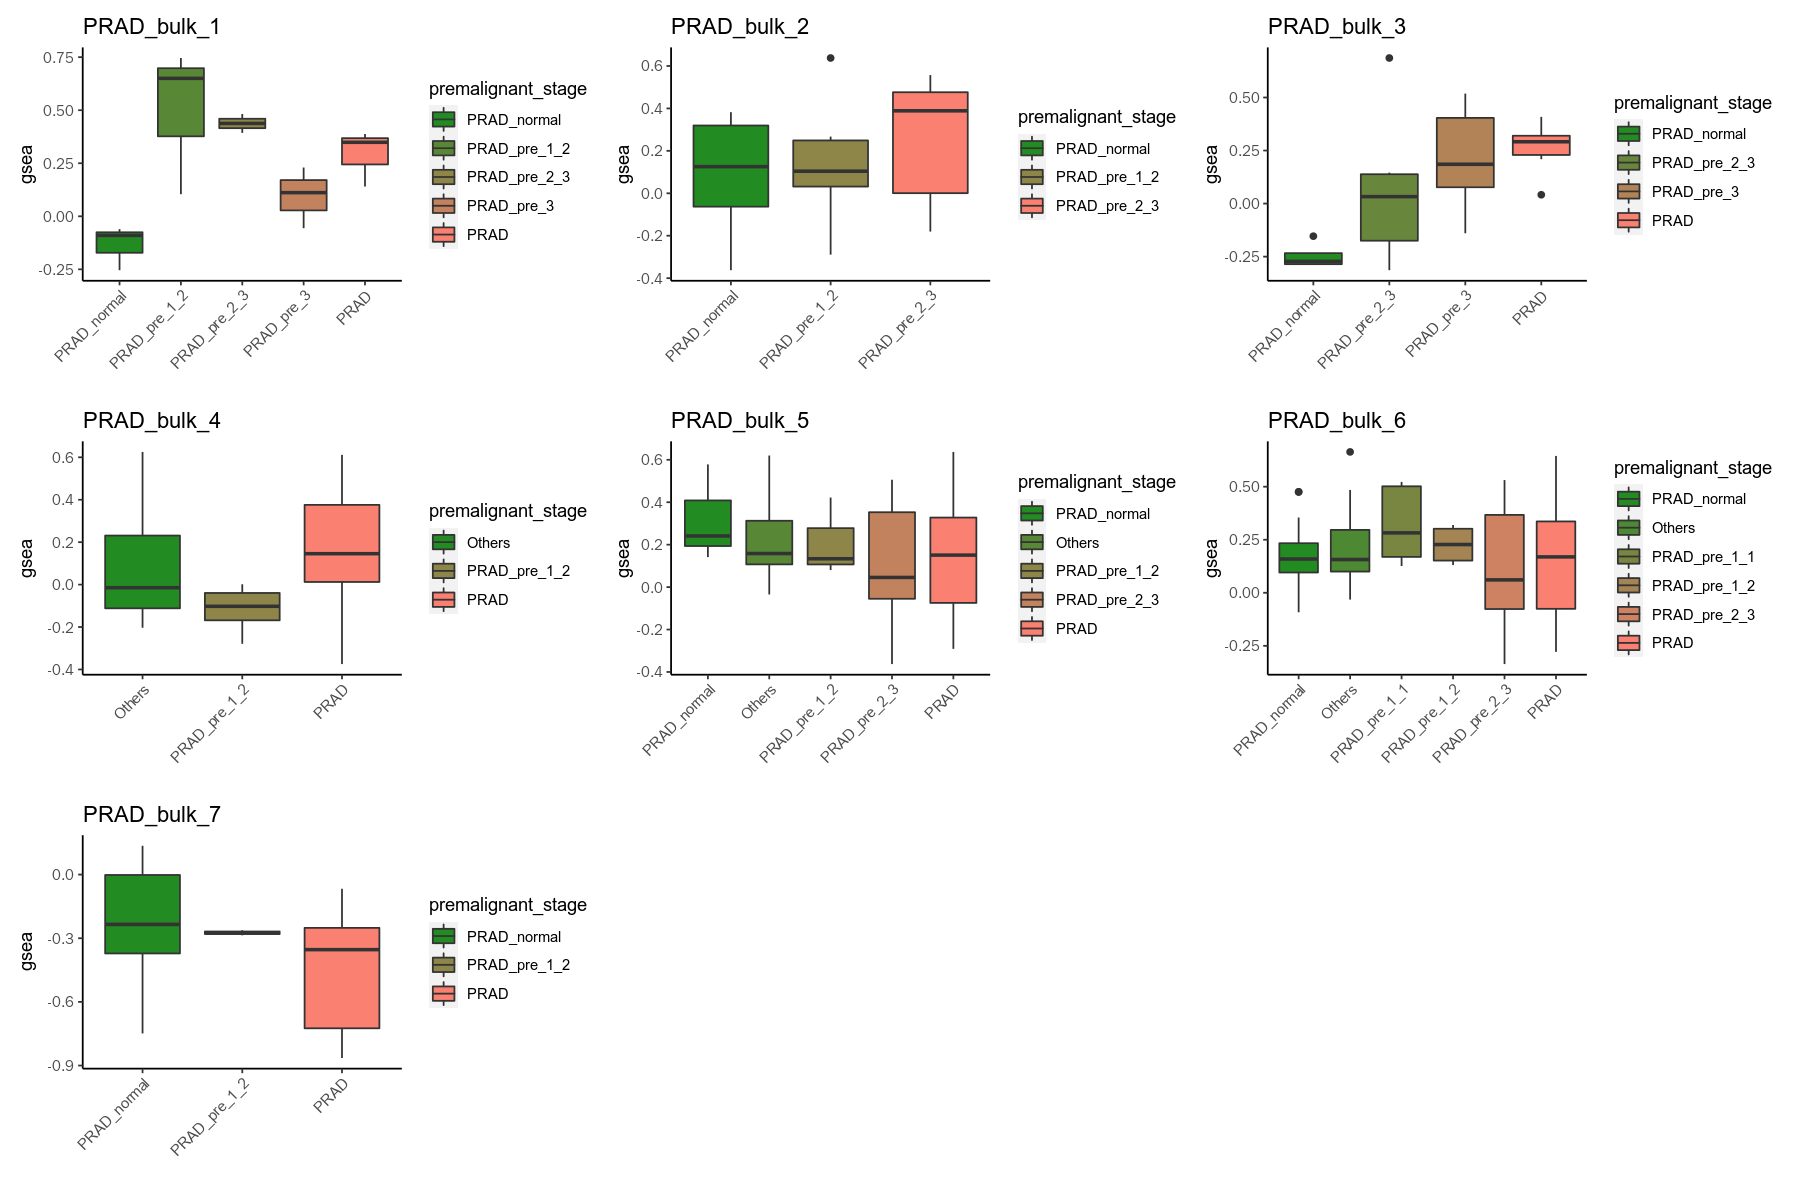

In [118]:
map(gsea.plot, wrap_plots)